# Julia Jupyter notebook for *Developmental hematopoietic stem cell fate decisions explain clonal dynamics over lifetime*

This notebook contains data processing code in Julia 

In [1]:
#packages
using Statistics
using LinearAlgebra
using DataStructures
using StatsBase
using StatsPlots
using Distributions
using LsqFit
using Random
using ColorSchemes
using Plots; pyplot()
using DelimitedFiles
using DataFrames 

#random number generator
rng = MersenneTwister()

#color definitions
logocolors = Colors.JULIA_LOGO_COLORS
color1 = RGBA(216/255,27/255,96/255,1)
color3 = RGBA(30/255,136/255,229/255,1)
color5 = RGBA(255/255,193/255,7/255,1)

## Data processing

### GSE154566

In [2]:
#load data
data = readdlm("GSE154566_Overlaping_probes_normalised_seperately_450K_betas.csv", ',', '\n')

318577×234 Matrix{Any}:
 ""                  "10006044052_R01C01"  …   "9992576177_R02C02"
 "cg00000029"       0.498892                  0.484891
 "cg00000109"       0.817556                  0.817997
 "cg00000165"       0.179883                  0.160364
 "cg00000236"       0.798099                  0.660895
 "cg00000289"       0.634214               …  0.623837
 "cg00000292"       0.824063                  0.838097
 "cg00000321"       0.22879                   0.205208
 "cg00000363"       0.376441                  0.313711
 "cg00000658"       0.719098                  0.763911
 "cg00000714"       0.251376               …  0.159904
 "cg00000721"       0.884065                  0.868202
 "cg00000734"       0.0738539                 0.0705506
 ⋮                                         ⋱  
 "ch.X.1282647F"    0.0499455              …  0.0585835
 "ch.X.139786812F"  0.162671                  0.111419
 "ch.X.1667329F"    0.0899154                 0.0631124
 "ch.X.2115742F"    0.129387      

In [3]:
df = DataFrame(data, :auto)

,x1,x2,x3,x4,x5
,Any,Any,Any,Any,Any
1,,10006044052_R01C01,10006044052_R02C01,10006044052_R03C02,10006044052_R04C02
2,cg00000029,0.498892,0.476118,0.47958,0.471654
3,cg00000109,0.817556,0.813888,0.812095,0.791422
4,cg00000165,0.179883,0.189214,0.149638,0.161325
5,cg00000236,0.798099,0.702129,0.707139,0.701104
6,cg00000289,0.634214,0.627158,0.574967,0.56945
7,cg00000292,0.824063,0.816499,0.796009,0.746328
8,cg00000321,0.22879,0.261396,0.251795,0.246833
9,cg00000363,0.376441,0.355281,0.270715,0.308939


In [4]:
df[1,1] = "fCpG"
df

,x1,x2,x3,x4,x5
,Any,Any,Any,Any,Any
1,fCpG,10006044052_R01C01,10006044052_R02C01,10006044052_R03C02,10006044052_R04C02
2,cg00000029,0.498892,0.476118,0.47958,0.471654
3,cg00000109,0.817556,0.813888,0.812095,0.791422
4,cg00000165,0.179883,0.189214,0.149638,0.161325
5,cg00000236,0.798099,0.702129,0.707139,0.701104
6,cg00000289,0.634214,0.627158,0.574967,0.56945
7,cg00000292,0.824063,0.816499,0.796009,0.746328
8,cg00000321,0.22879,0.261396,0.251795,0.246833
9,cg00000363,0.376441,0.355281,0.270715,0.308939


In [5]:
df = rename!(df, Symbol.(Vector(df[1,:])))[2:end,:]

,fCpG,10006044052_R01C01,10006044052_R02C01,10006044052_R03C02,10006044052_R04C02
,Any,Any,Any,Any,Any
1,cg00000029,0.498892,0.476118,0.47958,0.471654
2,cg00000109,0.817556,0.813888,0.812095,0.791422
3,cg00000165,0.179883,0.189214,0.149638,0.161325
4,cg00000236,0.798099,0.702129,0.707139,0.701104
5,cg00000289,0.634214,0.627158,0.574967,0.56945
6,cg00000292,0.824063,0.816499,0.796009,0.746328
7,cg00000321,0.22879,0.261396,0.251795,0.246833
8,cg00000363,0.376441,0.355281,0.270715,0.308939
9,cg00000658,0.719098,0.711952,0.751509,0.762474


In [6]:
names = vec(readdlm("names.csv", ',', '\n'))

234-element Vector{Any}:
 "fCpG"
 "9992576166_R01C01"
 "9992576166_R02C01"
 "9828653026_R06C01"
 "9828653026_R05C01"
 "200091640102_R05C02"
 "200091640102_R06C02"
 "200091640091_R05C01"
 "200091640091_R06C01"
 "200049730038_R06C02"
 "200049730038_R05C02"
 "9741779137_R02C01"
 "9741779137_R01C01"
 ⋮
 "200091640099_R05C01"
 "200091640098_R06C01"
 "200091640098_R05C01"
 "200091640091_R04C02"
 "200091640110_R03C02"
 "200091640110_R04C02"
 "200091640095_R06C01"
 "200091640095_R05C01"
 "200049730142_R05C01"
 "200049730142_R06C01"
 "200049730155_R05C02"
 "200049730155_R06C02"

In [7]:
df = select(df, names)

,fCpG,9992576166_R01C01,9992576166_R02C01,9828653026_R06C01,9828653026_R05C01
,Any,Any,Any,Any,Any
1,cg00000029,0.493626,0.503266,0.439301,0.458028
2,cg00000109,0.817643,0.778665,0.753585,0.751869
3,cg00000165,0.140595,0.18222,0.232363,0.176184
4,cg00000236,0.644091,0.75486,0.691443,0.654772
5,cg00000289,0.576489,0.543136,0.600879,0.50945
6,cg00000292,0.825083,0.823434,0.779807,0.844917
7,cg00000321,0.216095,0.277264,0.329172,0.290044
8,cg00000363,0.325742,0.320322,0.351296,0.414191
9,cg00000658,0.752294,0.728713,0.733595,0.70695


In [8]:
df

,fCpG,9992576166_R01C01,9992576166_R02C01,9828653026_R06C01,9828653026_R05C01
,Any,Any,Any,Any,Any
1,cg00000029,0.493626,0.503266,0.439301,0.458028
2,cg00000109,0.817643,0.778665,0.753585,0.751869
3,cg00000165,0.140595,0.18222,0.232363,0.176184
4,cg00000236,0.644091,0.75486,0.691443,0.654772
5,cg00000289,0.576489,0.543136,0.600879,0.50945
6,cg00000292,0.825083,0.823434,0.779807,0.844917
7,cg00000321,0.216095,0.277264,0.329172,0.290044
8,cg00000363,0.325742,0.320322,0.351296,0.414191
9,cg00000658,0.752294,0.728713,0.733595,0.70695


In [9]:
fCpG_list = vec(readdlm("TmobT.csv", ',', '\n'))

3918-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg02280132"
 "cg13218688"
 "cg25001930"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg00543073"
 ⋮
 "cg24863544"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [10]:
list_to_keep = intersect(fCpG_list,df[:,1])

3333-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg13218688"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg00543073"
 "cg26205981"
 "cg13423383"
 ⋮
 "cg04903509"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [11]:
rows_to_keep = findall(in(list_to_keep),df[:,1])

3333-element Vector{Int64}:
     37
     71
    184
    206
    552
    629
    777
    789
    922
    928
    952
    957
   1035
      ⋮
 316492
 316654
 316674
 316723
 316798
 316865
 317019
 317253
 317268
 317340
 317755
 317975

In [12]:
df = df[rows_to_keep,:]

,fCpG,9992576166_R01C01,9992576166_R02C01,9828653026_R06C01,9828653026_R05C01
,Any,Any,Any,Any,Any
1,cg00002224,0.580532,0.518924,0.541284,0.508417
2,cg00003900,0.492404,0.433927,0.325134,0.423033
3,cg00010853,0.409522,0.344653,0.434628,0.402997
4,cg00011924,0.449633,0.522867,0.380963,0.452266
5,cg00032609,0.444968,0.387245,0.361417,0.421886
6,cg00036723,0.406874,0.407983,0.449181,0.454695
7,cg00045910,0.401031,0.456112,0.402603,0.486151
8,cg00046899,0.478803,0.464836,0.518728,0.546602
9,cg00056066,0.580022,0.680973,0.6424,0.541501


In [13]:
df = df[:,Not([1,226])]

,9992576166_R01C01,9992576166_R02C01,9828653026_R06C01,9828653026_R05C01,200091640102_R05C02
,Any,Any,Any,Any,Any
1,0.580532,0.518924,0.541284,0.508417,0.513057
2,0.492404,0.433927,0.325134,0.423033,0.378266
3,0.409522,0.344653,0.434628,0.402997,0.40883
4,0.449633,0.522867,0.380963,0.452266,0.416926
5,0.444968,0.387245,0.361417,0.421886,0.402843
6,0.406874,0.407983,0.449181,0.454695,0.520499
7,0.401031,0.456112,0.402603,0.486151,0.405536
8,0.478803,0.464836,0.518728,0.546602,0.527635
9,0.580022,0.680973,0.6424,0.541501,0.686973


In [14]:
df_values = df

,9992576166_R01C01,9992576166_R02C01,9828653026_R06C01,9828653026_R05C01,200091640102_R05C02
,Any,Any,Any,Any,Any
1,0.580532,0.518924,0.541284,0.508417,0.513057
2,0.492404,0.433927,0.325134,0.423033,0.378266
3,0.409522,0.344653,0.434628,0.402997,0.40883
4,0.449633,0.522867,0.380963,0.452266,0.416926
5,0.444968,0.387245,0.361417,0.421886,0.402843
6,0.406874,0.407983,0.449181,0.454695,0.520499
7,0.401031,0.456112,0.402603,0.486151,0.405536
8,0.478803,0.464836,0.518728,0.546602,0.527635
9,0.580022,0.680973,0.6424,0.541501,0.686973


In [15]:
array_values = Matrix(df_values)

3333×232 Matrix{Any}:
 0.580532  0.518924  0.541284  0.508417  …  0.500029  0.568351  0.583363
 0.492404  0.433927  0.325134  0.423033     0.381501  0.378692  0.419293
 0.409522  0.344653  0.434628  0.402997     0.382956  0.421275  0.392581
 0.449633  0.522867  0.380963  0.452266     0.548655  0.43781   0.452341
 0.444968  0.387245  0.361417  0.421886     0.39392   0.440975  0.430682
 0.406874  0.407983  0.449181  0.454695  …  0.421799  0.441244  0.495107
 0.401031  0.456112  0.402603  0.486151     0.345791  0.436973  0.380908
 0.478803  0.464836  0.518728  0.546602     0.518311  0.476741  0.516618
 0.580022  0.680973  0.6424    0.541501     0.614612  0.631984  0.659888
 0.536108  0.512508  0.481903  0.488427     0.513064  0.44147   0.437228
 0.539305  0.665421  0.542498  0.482585  …  0.610265  0.524943  0.536886
 0.503809  0.476524  0.499128  0.541042     0.60011   0.452296  0.405075
 0.397003  0.44128   0.350295  0.262614     0.307896  0.313607  0.368587
 ⋮                           

In [16]:
parse.(Float64,string.(array_values))

3333×232 Matrix{Float64}:
 0.580532  0.518924  0.541284  0.508417  …  0.500029  0.568351  0.583363
 0.492404  0.433927  0.325134  0.423033     0.381501  0.378692  0.419293
 0.409522  0.344653  0.434628  0.402997     0.382956  0.421275  0.392581
 0.449633  0.522867  0.380963  0.452266     0.548655  0.43781   0.452341
 0.444968  0.387245  0.361417  0.421886     0.39392   0.440975  0.430682
 0.406874  0.407983  0.449181  0.454695  …  0.421799  0.441244  0.495107
 0.401031  0.456112  0.402603  0.486151     0.345791  0.436973  0.380908
 0.478803  0.464836  0.518728  0.546602     0.518311  0.476741  0.516618
 0.580022  0.680973  0.6424    0.541501     0.614612  0.631984  0.659888
 0.536108  0.512508  0.481903  0.488427     0.513064  0.44147   0.437228
 0.539305  0.665421  0.542498  0.482585  …  0.610265  0.524943  0.536886
 0.503809  0.476524  0.499128  0.541042     0.60011   0.452296  0.405075
 0.397003  0.44128   0.350295  0.262614     0.307896  0.313607  0.368587
 ⋮                       

In [17]:
pearson_values = cor(array_values)

232×232 Matrix{Float64}:
 1.0       0.759279  0.55204   0.577279  …  0.577152  0.56952   0.590643
 0.759279  1.0       0.588178  0.583946     0.560035  0.58719   0.60618
 0.55204   0.588178  1.0       0.766673     0.532857  0.552064  0.553579
 0.577279  0.583946  0.766673  1.0          0.563287  0.579047  0.586164
 0.570507  0.6067    0.549008  0.566057     0.581102  0.636082  0.643998
 0.614184  0.571863  0.563605  0.598069  …  0.610838  0.6226    0.630693
 0.48744   0.59428   0.517282  0.526018     0.515434  0.619013  0.616054
 0.526184  0.608423  0.524833  0.537776     0.540638  0.631977  0.629055
 0.586498  0.496393  0.52095   0.567608     0.564303  0.530223  0.537843
 0.586232  0.55213   0.542228  0.594106     0.598259  0.57035   0.57536
 0.500194  0.620947  0.589813  0.579245  …  0.487895  0.545188  0.546247
 0.553213  0.618806  0.631524  0.628254     0.530867  0.570289  0.566125
 0.55133   0.609537  0.551037  0.565403     0.55401   0.632193  0.620441
 ⋮                          

In [18]:
mz_comparisons = zeros(Integer(size(pearson_values,1)/2))
for i = 1:length(mz_comparisons)
    mz_comparisons[i] = pearson_values[2*i,2*i-1]
end
mz_comparisons

116-element Vector{Float64}:
 0.7592791145033317
 0.7666731979537195
 0.8685994808582757
 0.9111611175888463
 0.7347129460026852
 0.8586927791935975
 0.9153996705733004
 0.8655110606225173
 0.8131668550122045
 0.7503243153013134
 0.8917418630058437
 0.9251297837913698
 0.7521905532208026
 ⋮
 0.7740989092908303
 0.7530876615881256
 0.9293087290529605
 0.6306978039210724
 0.8721603269164938
 0.8245953700303094
 0.8463275205784839
 0.9142275031412642
 0.9011261212790148
 0.7591108154736783
 0.6828658515268935
 0.8342851947866975

In [19]:
mean(mz_comparisons)

0.8373723905983584

In [20]:
ur_comparisons = zeros(Integer(size(pearson_values,1)/2)-1)
for i = 1:length(ur_comparisons)
    ur_comparisons[i] = pearson_values[2*i+1,2*i]
end
ur_comparisons

115-element Vector{Float64}:
 0.588177531585105
 0.5660570896365491
 0.5895406941050033
 0.4851021499375998
 0.5143118920524951
 0.5980052534324688
 0.5761242086439631
 0.5145452552553917
 0.5756162790953256
 0.5619193084881426
 0.6583603656458868
 0.5615253785696487
 0.5871419839082909
 ⋮
 0.5788339501360124
 0.5363729563082044
 0.5108314475491605
 0.5876890456250283
 0.503438459693161
 0.5803064355440188
 0.5442814372098407
 0.6085130548781541
 0.6482863736047128
 0.6415033152762666
 0.53282708221342
 0.5634861774824385

In [21]:
mean(ur_comparisons)

0.576683492006119

In [22]:
GSE154566_mz_mean = mean(mz_comparisons)
GSE154566_mz = mz_comparisons
GSE154566_ur_mean = mean(ur_comparisons)
GSE154566_ur = ur_comparisons

115-element Vector{Float64}:
 0.588177531585105
 0.5660570896365491
 0.5895406941050033
 0.4851021499375998
 0.5143118920524951
 0.5980052534324688
 0.5761242086439631
 0.5145452552553917
 0.5756162790953256
 0.5619193084881426
 0.6583603656458868
 0.5615253785696487
 0.5871419839082909
 ⋮
 0.5788339501360124
 0.5363729563082044
 0.5108314475491605
 0.5876890456250283
 0.503438459693161
 0.5803064355440188
 0.5442814372098407
 0.6085130548781541
 0.6482863736047128
 0.6415033152762666
 0.53282708221342
 0.5634861774824385

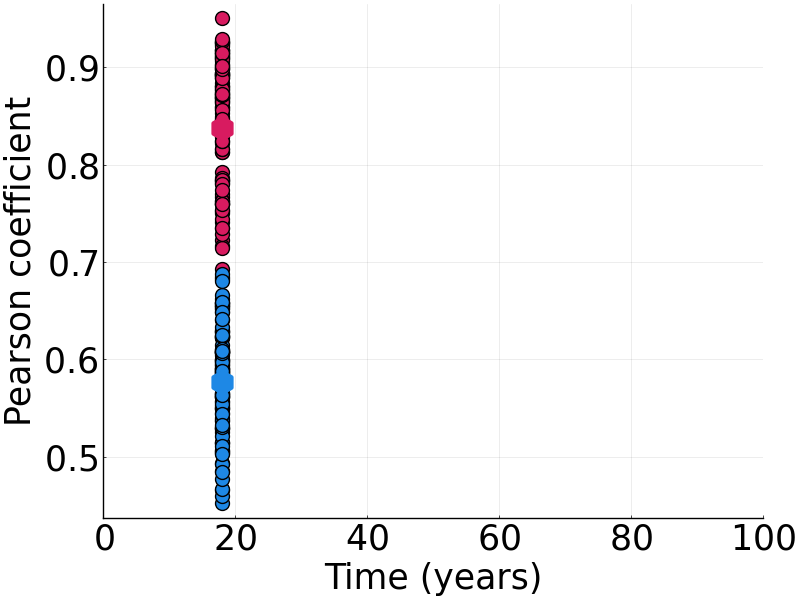

In [23]:
scatter()
scatter!([18.0], GSE154566_mz, xlims = [0, 100], markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE154566_mz_mean], xlims = [0, 100], markersize = 15, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE154566_ur, xlims = [0, 100], markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE154566_ur_mean], xlims = [0, 100], markersize = 15, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), markerstrokecolor = color3, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

### GSE36642

In [24]:
#load data
data_mz = readdlm("GSE36642_MZ.csv", ',', '\n')
data_dz = readdlm("GSE36642_DZ.csv", ',', '\n')

188×17 Matrix{Any}:
 ""                     "Twin 1001 sib1"  …    "Twin 3027 sib2"
 "twin"                 "DZ"                   "DZ"
 "placenta"             "DC"                   "DC"
 "sex"                  "M"                    "M"
 "age (gestational)"  34                     36
 "ID_REF"               "GSM897841"       …    "GSM897889"
 "cg00846036"          0.495071               0.473162
 "cg05225996"          0.406895               0.346859
 "cg07059360"          0.388632               0.38071
 "cg16005224"          0.548715               0.432363
 "cg16853982"          0.2843             …   0.334762
 "cg22584138"          0.226997               0.279313
 "cg04743872"          0.284306               0.22379
 ⋮                                        ⋱  
 "cg06500079"          0.304083               0.39341
 "cg08927738"          0.45079                0.477903
 "cg11577097"          0.505161               0.500143
 "cg16639185"          0.468261               0.54028
 "cg014

In [25]:
df_mz = DataFrame(data_mz, :auto)
df_dz = DataFrame(data_dz, :auto)

,x1,x2,x3,x4,x5
,Any,Any,Any,Any,Any
1,,Twin 1001 sib1,Twin 1001 sib2,Twin 1021 sib1,Twin 1021 sib2
2,twin,DZ,DZ,DZ,DZ
3,placenta,DC,DC,DC,DC
4,sex,M,F,F,M
5,age (gestational),34,34,37,37
6,ID_REF,GSM897841,GSM897842,GSM897851,GSM897852
7,cg00846036,0.495071,0.47306,0.364118,0.489037
8,cg05225996,0.406895,0.34912,0.344538,0.329059
9,cg07059360,0.388632,0.369915,0.483987,0.495117


In [26]:
df_mz = df_mz[Not(1,2,3,4,5,6),:]
df_dz = df_dz[Not(1,2,3,4,5,6),:]

,x1,x2,x3,x4,x5,x6,x7,x8
,Any,Any,Any,Any,Any,Any,Any,Any
1,cg00846036,0.495071,0.47306,0.364118,0.489037,0.490205,0.510755,0.51262
2,cg05225996,0.406895,0.34912,0.344538,0.329059,0.348881,0.28078,0.361686
3,cg07059360,0.388632,0.369915,0.483987,0.495117,0.389492,0.36428,0.395808
4,cg16005224,0.548715,0.486631,0.516304,0.523207,0.588638,0.473346,0.526531
5,cg16853982,0.2843,0.331483,0.269458,0.228858,0.267908,0.284291,0.340264
6,cg22584138,0.226997,0.294033,0.301602,0.323253,0.216731,0.171143,0.239562
7,cg04743872,0.284306,0.167744,0.274528,0.282306,0.278025,0.223169,0.289332
8,cg21993406,0.490868,0.519594,0.283259,0.285508,0.525043,0.246018,0.441367
9,cg24975842,0.461481,0.475247,0.479135,0.488229,0.456741,0.455282,0.495585


In [27]:
fCpG_list = vec(readdlm("TmobT.csv", ',', '\n'))

3918-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg02280132"
 "cg13218688"
 "cg25001930"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg00543073"
 ⋮
 "cg24863544"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [28]:
list_to_keep = intersect(fCpG_list,df_mz[:,1])

182-element Vector{Any}:
 "cg00846036"
 "cg05225996"
 "cg07059360"
 "cg16005224"
 "cg16853982"
 "cg22584138"
 "cg04743872"
 "cg21993406"
 "cg24975842"
 "cg11935638"
 "cg24981018"
 "cg10124201"
 "cg27016307"
 ⋮
 "cg06500079"
 "cg08927738"
 "cg11577097"
 "cg16639185"
 "cg01405107"
 "cg03101664"
 "cg25853078"
 "cg24956866"
 "cg23894058"
 "cg18292394"
 "cg17093267"
 "cg12990410"

In [29]:
list_to_keep = intersect(fCpG_list,df_dz[:,1])

182-element Vector{Any}:
 "cg00846036"
 "cg05225996"
 "cg07059360"
 "cg16005224"
 "cg16853982"
 "cg22584138"
 "cg04743872"
 "cg21993406"
 "cg24975842"
 "cg11935638"
 "cg24981018"
 "cg10124201"
 "cg27016307"
 ⋮
 "cg06500079"
 "cg08927738"
 "cg11577097"
 "cg16639185"
 "cg01405107"
 "cg03101664"
 "cg25853078"
 "cg24956866"
 "cg23894058"
 "cg18292394"
 "cg17093267"
 "cg12990410"

In [30]:
df_mz_values = df_mz[:,Not(1)]
df_dz_values = df_dz[:,Not(1)]

,x2,x3,x4,x5,x6,x7,x8,x9
,Any,Any,Any,Any,Any,Any,Any,Any
1,0.495071,0.47306,0.364118,0.489037,0.490205,0.510755,0.51262,0.434203
2,0.406895,0.34912,0.344538,0.329059,0.348881,0.28078,0.361686,0.416282
3,0.388632,0.369915,0.483987,0.495117,0.389492,0.36428,0.395808,0.373736
4,0.548715,0.486631,0.516304,0.523207,0.588638,0.473346,0.526531,0.471293
5,0.2843,0.331483,0.269458,0.228858,0.267908,0.284291,0.340264,0.298946
6,0.226997,0.294033,0.301602,0.323253,0.216731,0.171143,0.239562,0.355542
7,0.284306,0.167744,0.274528,0.282306,0.278025,0.223169,0.289332,0.27976
8,0.490868,0.519594,0.283259,0.285508,0.525043,0.246018,0.441367,0.453217
9,0.461481,0.475247,0.479135,0.488229,0.456741,0.455282,0.495585,0.437698


In [31]:
array_values_mz = Matrix(df_mz_values)
array_values_dz = Matrix(df_dz_values)

182×16 Matrix{Any}:
 0.495071  0.47306   0.364118  0.489037  …  0.414944  0.452616  0.473162
 0.406895  0.34912   0.344538  0.329059     0.34755   0.394425  0.346859
 0.388632  0.369915  0.483987  0.495117     0.355097  0.389654  0.38071
 0.548715  0.486631  0.516304  0.523207     0.431926  0.423506  0.432363
 0.2843    0.331483  0.269458  0.228858     0.253602  0.313455  0.334762
 0.226997  0.294033  0.301602  0.323253  …  0.254853  0.216358  0.279313
 0.284306  0.167744  0.274528  0.282306     0.170967  0.195827  0.22379
 0.490868  0.519594  0.283259  0.285508     0.429528  0.447535  0.443888
 0.461481  0.475247  0.479135  0.488229     0.403501  0.468121  0.455086
 0.276262  0.277492  0.264671  0.248868     0.341103  0.292177  0.285797
 0.53778   0.563331  0.544121  0.534282  …  0.497725  0.569031  0.504986
 0.39851   0.418494  0.455262  0.419599     0.423861  0.443587  0.407473
 0.47667   0.523868  0.384296  0.405412     0.425964  0.421126  0.360271
 ⋮                               

In [32]:
parse.(Float64,string.(array_values_mz))
parse.(Float64,string.(array_values_dz))

182×16 Matrix{Float64}:
 0.495071  0.47306   0.364118  0.489037  …  0.414944  0.452616  0.473162
 0.406895  0.34912   0.344538  0.329059     0.34755   0.394425  0.346859
 0.388632  0.369915  0.483987  0.495117     0.355097  0.389654  0.38071
 0.548715  0.486631  0.516304  0.523207     0.431926  0.423506  0.432363
 0.2843    0.331483  0.269458  0.228858     0.253602  0.313455  0.334762
 0.226997  0.294033  0.301602  0.323253  …  0.254853  0.216358  0.279313
 0.284306  0.167744  0.274528  0.282306     0.170967  0.195827  0.22379
 0.490868  0.519594  0.283259  0.285508     0.429528  0.447535  0.443888
 0.461481  0.475247  0.479135  0.488229     0.403501  0.468121  0.455086
 0.276262  0.277492  0.264671  0.248868     0.341103  0.292177  0.285797
 0.53778   0.563331  0.544121  0.534282  …  0.497725  0.569031  0.504986
 0.39851   0.418494  0.455262  0.419599     0.423861  0.443587  0.407473
 0.47667   0.523868  0.384296  0.405412     0.425964  0.421126  0.360271
 ⋮                           

In [33]:
pearson_values_mz = cor(array_values_mz)
pearson_values_dz = cor(array_values_dz)

16×16 Matrix{Float64}:
 1.0       0.768834  0.629191  0.692582  …  0.723363  0.804731  0.789231
 0.768834  1.0       0.564252  0.582688     0.72412   0.756251  0.703088
 0.629191  0.564252  1.0       0.863075     0.557848  0.699518  0.694808
 0.692582  0.582688  0.863075  1.0          0.620944  0.706187  0.713571
 0.788789  0.743563  0.691719  0.746314     0.688371  0.821197  0.832706
 0.643491  0.595369  0.583176  0.662009  …  0.647707  0.615601  0.691911
 0.728925  0.65612   0.561398  0.611331     0.717935  0.686127  0.692437
 0.713953  0.68028   0.64211   0.69222      0.619906  0.724465  0.733043
 0.461078  0.49506   0.446425  0.44513      0.498538  0.503781  0.430452
 0.525238  0.522238  0.47909   0.490233     0.499075  0.539624  0.523337
 0.809331  0.768119  0.621977  0.659322  …  0.648177  0.775459  0.745
 0.803173  0.730774  0.669641  0.691312     0.678165  0.798085  0.803658
 0.728988  0.640994  0.599804  0.67449      0.730252  0.71121   0.707581
 0.723363  0.72412   0.557848  

In [34]:
mz_comparisons = zeros(Integer(size(pearson_values_mz,1)/2))
for i = 1:length(mz_comparisons)
    mz_comparisons[i] = pearson_values_mz[2*i,2*i-1]
end
mz_comparisons

17-element Vector{Float64}:
 0.8848955804360108
 0.9215037950822402
 0.9002190993572582
 0.8880580308304481
 0.8528921242317953
 0.7882777336256837
 0.8733544563952844
 0.7087534368449776
 0.8057263737230925
 0.957411599551431
 0.6680122463922464
 0.8512435120865267
 0.6419381109972301
 0.7261740563416282
 0.9194396373757042
 0.7556829339785375
 0.8965710121482321

In [35]:
mean(mz_comparisons)

0.8258913964351957

In [36]:
dz_comparisons = zeros(Integer(size(pearson_values_dz,1)/2))
for i = 1:length(dz_comparisons)
    dz_comparisons[i] = pearson_values_dz[2*i,2*i-1]
end
dz_comparisons

8-element Vector{Float64}:
 0.7688342819310727
 0.8630745466999313
 0.7236710909585176
 0.6935237031603457
 0.3482517692972864
 0.8653076143351549
 0.7302523732549155
 0.8394225433868634

In [37]:
mean(dz_comparisons)

0.729042240378011

In [38]:
ur_comparisons = zeros(Integer(size(pearson_values_mz,1)/2)-1)
for i = 1:length(ur_comparisons)
    ur_comparisons[i] = pearson_values_mz[2*i+1,2*i]
end
ur_comparisons

16-element Vector{Float64}:
 0.6166160175378654
 0.6691526504875114
 0.7618510802873648
 0.7675014764021926
 0.5777205980481634
 0.7282021373214923
 0.6242774429521766
 0.6778652078720119
 0.7029591695234656
 0.6126501337105988
 0.5481434564380786
 0.6438860331360994
 0.539632767972474
 0.5386318545709154
 0.5533277187639255
 0.6859369762747306

In [39]:
mean(ur_comparisons)

0.6405221700811916

In [40]:
GSE36642_mz_mean = mean(mz_comparisons)
GSE36642_mz = mz_comparisons
GSE36642_dz_mean = mean(dz_comparisons)
GSE36642_dz = dz_comparisons
GSE36642_ur_mean = mean(ur_comparisons)
GSE36642_ur = ur_comparisons

16-element Vector{Float64}:
 0.6166160175378654
 0.6691526504875114
 0.7618510802873648
 0.7675014764021926
 0.5777205980481634
 0.7282021373214923
 0.6242774429521766
 0.6778652078720119
 0.7029591695234656
 0.6126501337105988
 0.5481434564380786
 0.6438860331360994
 0.539632767972474
 0.5386318545709154
 0.5533277187639255
 0.6859369762747306

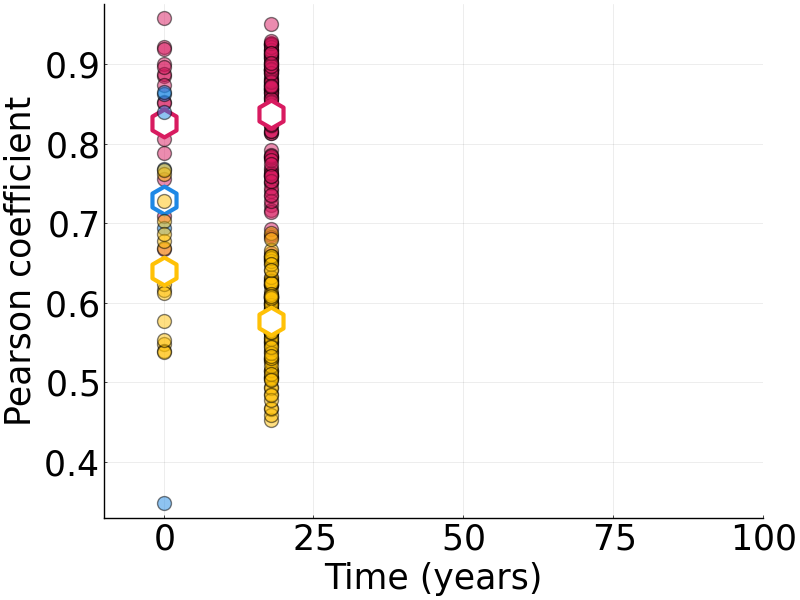

In [41]:
scatter()

scatter!([18.0], GSE154566_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE154566_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE154566_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE154566_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([0.0], GSE36642_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_dz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

### GSE43975

In [42]:
#load data
data = readdlm("GSE43975.csv", ',', '\n')

485513×79 Matrix{Any}:
 "ID_REF"           "GSM1075742"  …   "GSM1075818"   "GSM1075819"
 "cg00000029"      0.554323          0.632573       0.678526
 "cg00000108"      0.955294          0.962169       0.956849
 "cg00000109"      0.917895          0.89031        0.899642
 "cg00000165"      0.157985          0.353373       0.234333
 "cg00000236"      0.805694       …  0.793508       0.827552
 "cg00000289"      0.693228          0.756678       0.72336
 "cg00000292"      0.863528          0.876667       0.873786
 "cg00000321"      0.353787          0.340335       0.315234
 "cg00000363"      0.378117          0.387995       0.402751
 "cg00000622"      0.0240794      …  0.0108051      0.0215346
 "cg00000658"      0.833125          0.833998       0.860735
 "cg00000714"      0.206843          0.189445       0.20682
 ⋮                                ⋱                 
 "ch.X.92543860F"  0.0411318         0.0226876      0.030945
 "ch.X.92554290F"  0.0473127         0.0276178      0.0321985
 "ch

In [43]:
df = DataFrame(data, :auto)

,x1,x2,x3,x4,x5,x6,x7
,Any,Any,Any,Any,Any,Any,Any
1,ID_REF,GSM1075742,GSM1075743,GSM1075744,GSM1075745,GSM1075746,GSM1075747
2,cg00000029,0.554323,0.591826,0.567487,0.519316,0.610165,0.566651
3,cg00000108,0.955294,0.967144,0.956659,0.957583,0.971294,0.961957
4,cg00000109,0.917895,0.934004,0.95067,0.927331,0.916245,0.941727
5,cg00000165,0.157985,0.183542,0.159049,0.162992,0.177371,0.128253
6,cg00000236,0.805694,0.869673,0.820015,0.766505,0.81879,0.808672
7,cg00000289,0.693228,0.772395,0.785792,0.810159,0.744002,0.727292
8,cg00000292,0.863528,0.857026,0.8553,0.851219,0.861349,0.864358
9,cg00000321,0.353787,0.348586,0.262648,0.270172,0.27049,0.279838


In [44]:
df[1,1] = "fCpG"
df

,x1,x2,x3,x4,x5,x6,x7
,Any,Any,Any,Any,Any,Any,Any
1,fCpG,GSM1075742,GSM1075743,GSM1075744,GSM1075745,GSM1075746,GSM1075747
2,cg00000029,0.554323,0.591826,0.567487,0.519316,0.610165,0.566651
3,cg00000108,0.955294,0.967144,0.956659,0.957583,0.971294,0.961957
4,cg00000109,0.917895,0.934004,0.95067,0.927331,0.916245,0.941727
5,cg00000165,0.157985,0.183542,0.159049,0.162992,0.177371,0.128253
6,cg00000236,0.805694,0.869673,0.820015,0.766505,0.81879,0.808672
7,cg00000289,0.693228,0.772395,0.785792,0.810159,0.744002,0.727292
8,cg00000292,0.863528,0.857026,0.8553,0.851219,0.861349,0.864358
9,cg00000321,0.353787,0.348586,0.262648,0.270172,0.27049,0.279838


In [45]:
df = rename!(df, Symbol.(Vector(df[1,:])))[2:end,:]

,fCpG,GSM1075742,GSM1075743,GSM1075744,GSM1075745,GSM1075746,GSM1075747
,Any,Any,Any,Any,Any,Any,Any
1,cg00000029,0.554323,0.591826,0.567487,0.519316,0.610165,0.566651
2,cg00000108,0.955294,0.967144,0.956659,0.957583,0.971294,0.961957
3,cg00000109,0.917895,0.934004,0.95067,0.927331,0.916245,0.941727
4,cg00000165,0.157985,0.183542,0.159049,0.162992,0.177371,0.128253
5,cg00000236,0.805694,0.869673,0.820015,0.766505,0.81879,0.808672
6,cg00000289,0.693228,0.772395,0.785792,0.810159,0.744002,0.727292
7,cg00000292,0.863528,0.857026,0.8553,0.851219,0.861349,0.864358
8,cg00000321,0.353787,0.348586,0.262648,0.270172,0.27049,0.279838
9,cg00000363,0.378117,0.368641,0.373653,0.375738,0.391852,0.390443


In [46]:
names = vec(readdlm("names.csv", ',', '\n'))

234-element Vector{Any}:
 "fCpG"
 "9992576166_R01C01"
 "9992576166_R02C01"
 "9828653026_R06C01"
 "9828653026_R05C01"
 "200091640102_R05C02"
 "200091640102_R06C02"
 "200091640091_R05C01"
 "200091640091_R06C01"
 "200049730038_R06C02"
 "200049730038_R05C02"
 "9741779137_R02C01"
 "9741779137_R01C01"
 ⋮
 "200091640099_R05C01"
 "200091640098_R06C01"
 "200091640098_R05C01"
 "200091640091_R04C02"
 "200091640110_R03C02"
 "200091640110_R04C02"
 "200091640095_R06C01"
 "200091640095_R05C01"
 "200049730142_R05C01"
 "200049730142_R06C01"
 "200049730155_R05C02"
 "200049730155_R06C02"

In [47]:
df

,fCpG,GSM1075742,GSM1075743,GSM1075744,GSM1075745,GSM1075746,GSM1075747
,Any,Any,Any,Any,Any,Any,Any
1,cg00000029,0.554323,0.591826,0.567487,0.519316,0.610165,0.566651
2,cg00000108,0.955294,0.967144,0.956659,0.957583,0.971294,0.961957
3,cg00000109,0.917895,0.934004,0.95067,0.927331,0.916245,0.941727
4,cg00000165,0.157985,0.183542,0.159049,0.162992,0.177371,0.128253
5,cg00000236,0.805694,0.869673,0.820015,0.766505,0.81879,0.808672
6,cg00000289,0.693228,0.772395,0.785792,0.810159,0.744002,0.727292
7,cg00000292,0.863528,0.857026,0.8553,0.851219,0.861349,0.864358
8,cg00000321,0.353787,0.348586,0.262648,0.270172,0.27049,0.279838
9,cg00000363,0.378117,0.368641,0.373653,0.375738,0.391852,0.390443


In [48]:
fCpG_list = vec(readdlm("TmobT.csv", ',', '\n'))

3918-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg02280132"
 "cg13218688"
 "cg25001930"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg00543073"
 ⋮
 "cg24863544"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [49]:
list_to_keep = intersect(fCpG_list,df[:,1])

3918-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg02280132"
 "cg13218688"
 "cg25001930"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg00543073"
 ⋮
 "cg24863544"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [50]:
rows_to_keep = findall(in(list_to_keep),df[:,1])

3918-element Vector{Int64}:
     25
     50
     88
     90
    254
    281
    284
    805
    920
   1100
   1132
   1150
   1339
      ⋮
 480557
 480669
 480761
 481011
 481364
 481391
 481497
 481676
 482090
 482355
 482388
 482420

In [51]:
df = df[rows_to_keep,:]

,fCpG,GSM1075742,GSM1075743,GSM1075744,GSM1075745,GSM1075746,GSM1075747
,Any,Any,Any,Any,Any,Any,Any
1,cg00001261,0.407798,0.38557,0.432726,0.44251,0.493201,0.503078
2,cg00002224,0.473989,0.499515,0.532375,0.517631,0.628175,0.640384
3,cg00003818,0.380042,0.374702,0.423247,0.450459,0.283589,0.288516
4,cg00003900,0.499155,0.494472,0.499983,0.499079,0.513194,0.508324
5,cg00010853,0.526473,0.486648,0.506711,0.516248,0.460374,0.472635
6,cg00011856,0.630268,0.481027,0.612973,0.634406,0.479679,0.508645
7,cg00011924,0.594623,0.582728,0.389026,0.372656,0.459803,0.448663
8,cg00032609,0.43446,0.40344,0.424927,0.437025,0.470934,0.502426
9,cg00036723,0.621546,0.588475,0.477575,0.49721,0.485886,0.491546


In [52]:
df = df[:,Not(1)]

,GSM1075742,GSM1075743,GSM1075744,GSM1075745,GSM1075746,GSM1075747,GSM1075748
,Any,Any,Any,Any,Any,Any,Any
1,0.407798,0.38557,0.432726,0.44251,0.493201,0.503078,0.515093
2,0.473989,0.499515,0.532375,0.517631,0.628175,0.640384,0.548058
3,0.380042,0.374702,0.423247,0.450459,0.283589,0.288516,0.402256
4,0.499155,0.494472,0.499983,0.499079,0.513194,0.508324,0.552387
5,0.526473,0.486648,0.506711,0.516248,0.460374,0.472635,0.456049
6,0.630268,0.481027,0.612973,0.634406,0.479679,0.508645,0.654647
7,0.594623,0.582728,0.389026,0.372656,0.459803,0.448663,0.340532
8,0.43446,0.40344,0.424927,0.437025,0.470934,0.502426,0.427878
9,0.621546,0.588475,0.477575,0.49721,0.485886,0.491546,0.480673


In [53]:
df_values = df

,GSM1075742,GSM1075743,GSM1075744,GSM1075745,GSM1075746,GSM1075747,GSM1075748
,Any,Any,Any,Any,Any,Any,Any
1,0.407798,0.38557,0.432726,0.44251,0.493201,0.503078,0.515093
2,0.473989,0.499515,0.532375,0.517631,0.628175,0.640384,0.548058
3,0.380042,0.374702,0.423247,0.450459,0.283589,0.288516,0.402256
4,0.499155,0.494472,0.499983,0.499079,0.513194,0.508324,0.552387
5,0.526473,0.486648,0.506711,0.516248,0.460374,0.472635,0.456049
6,0.630268,0.481027,0.612973,0.634406,0.479679,0.508645,0.654647
7,0.594623,0.582728,0.389026,0.372656,0.459803,0.448663,0.340532
8,0.43446,0.40344,0.424927,0.437025,0.470934,0.502426,0.427878
9,0.621546,0.588475,0.477575,0.49721,0.485886,0.491546,0.480673


In [54]:
array_values = Matrix(df_values)

3918×78 Matrix{Any}:
 0.407798  0.38557   0.432726  0.44251   …  0.411429  0.46799   0.4964
 0.473989  0.499515  0.532375  0.517631     0.566565  0.567411  0.575701
 0.380042  0.374702  0.423247  0.450459     0.52691   0.466304  0.452675
 0.499155  0.494472  0.499983  0.499079     0.482866  0.506137  0.559346
 0.526473  0.486648  0.506711  0.516248     0.563484  0.542598  0.502938
 0.630268  0.481027  0.612973  0.634406  …  0.558485  0.603297  0.578039
 0.594623  0.582728  0.389026  0.372656     0.430335  0.427184  0.42072
 0.43446   0.40344   0.424927  0.437025     0.420784  0.537632  0.515822
 0.621546  0.588475  0.477575  0.49721      0.591581  0.499191  0.516508
 0.62326   0.552097  0.587231  0.599381     0.55355   0.655277  0.624772
 0.451084  0.49009   0.530213  0.510968  …  0.445087  0.521034  0.550075
 0.588328  0.508344  0.568324  0.596107     0.571114  0.547787  0.556889
 0.571303  0.646452  0.482379  0.460732     0.602273  0.573527  0.55225
 ⋮                                

In [55]:
parse.(Float64,string.(array_values))

3918×78 Matrix{Float64}:
 0.407798  0.38557   0.432726  0.44251   …  0.411429  0.46799   0.4964
 0.473989  0.499515  0.532375  0.517631     0.566565  0.567411  0.575701
 0.380042  0.374702  0.423247  0.450459     0.52691   0.466304  0.452675
 0.499155  0.494472  0.499983  0.499079     0.482866  0.506137  0.559346
 0.526473  0.486648  0.506711  0.516248     0.563484  0.542598  0.502938
 0.630268  0.481027  0.612973  0.634406  …  0.558485  0.603297  0.578039
 0.594623  0.582728  0.389026  0.372656     0.430335  0.427184  0.42072
 0.43446   0.40344   0.424927  0.437025     0.420784  0.537632  0.515822
 0.621546  0.588475  0.477575  0.49721      0.591581  0.499191  0.516508
 0.62326   0.552097  0.587231  0.599381     0.55355   0.655277  0.624772
 0.451084  0.49009   0.530213  0.510968  …  0.445087  0.521034  0.550075
 0.588328  0.508344  0.568324  0.596107     0.571114  0.547787  0.556889
 0.571303  0.646452  0.482379  0.460732     0.602273  0.573527  0.55225
 ⋮                            

In [56]:
pearson_values = cor(array_values)

78×78 Matrix{Float64}:
 1.0       0.784835  0.625251  0.627179  …  0.537875  0.514073  0.52631
 0.784835  1.0       0.584859  0.55722      0.53421   0.474071  0.499064
 0.625251  0.584859  1.0       0.934155     0.549773  0.571295  0.575469
 0.627179  0.55722   0.934155  1.0          0.546587  0.57162   0.569076
 0.637682  0.587492  0.628748  0.623906     0.575009  0.569156  0.573292
 0.6335    0.583127  0.616103  0.61678   …  0.581121  0.569242  0.571451
 0.529246  0.530028  0.557667  0.536366     0.492266  0.487947  0.516736
 0.58733   0.587435  0.583613  0.556219     0.518629  0.505412  0.540387
 0.520884  0.468108  0.535478  0.539242     0.499843  0.524553  0.539084
 0.508583  0.50377   0.52784   0.509143     0.499657  0.500282  0.523209
 0.562243  0.535565  0.542647  0.535783  …  0.562418  0.525762  0.549779
 0.565424  0.565814  0.544159  0.531272     0.56711   0.520648  0.546596
 0.595694  0.605501  0.538748  0.509116     0.497309  0.482089  0.509373
 ⋮                           

In [57]:
mz_comparisons = zeros(Integer(size(pearson_values,1)/2))
for i = 1:length(mz_comparisons)
    mz_comparisons[i] = pearson_values[2*i,2*i-1]
end
mz_comparisons

39-element Vector{Float64}:
 0.7848348655432394
 0.9341551720187627
 0.9314169646043535
 0.7879217818945573
 0.9143990400216395
 0.9213419191493338
 0.9142150277678318
 0.775798084769491
 0.909958648688578
 0.8802643034188744
 0.8712465535860725
 0.9237528023085816
 0.7336300975341864
 ⋮
 0.731426035797685
 0.8774350178739678
 0.935475285323669
 0.9322221543854959
 0.9216687209319357
 0.7156929100335472
 0.9326547039544565
 0.7129684371449663
 0.9036756346693412
 0.676376345658748
 0.8033039483635208
 0.9241218886701501

In [58]:
mean(mz_comparisons)

0.8534875792188973

In [59]:
ur_comparisons = zeros(Integer(size(pearson_values,1)/2)-1)
for i = 1:length(ur_comparisons)
    ur_comparisons[i] = pearson_values[2*i+1,2*i]
end
ur_comparisons

38-element Vector{Float64}:
 0.5848588509838437
 0.6239064522909752
 0.5669668807609285
 0.5368492004327621
 0.5804832742583287
 0.5390704080393114
 0.5780380393706818
 0.5716589804210968
 0.5232313328922499
 0.5817233223876486
 0.5170160629075125
 0.516775876097459
 0.5942474697223986
 ⋮
 0.4647563748913157
 0.4942043346294709
 0.5384284380147812
 0.5255001586847617
 0.5960496292138886
 0.5608114866016221
 0.5612284230419846
 0.53897258905002
 0.5163418070867031
 0.5333432772426044
 0.5148428013884736
 0.5592330648988779

In [60]:
mean(ur_comparisons)

0.5544067808055244

In [61]:
GSE43975_mz_mean = mean(mz_comparisons)
GSE43975_mz = mz_comparisons
GSE43975_ur_mean = mean(ur_comparisons)
GSE43975_ur = ur_comparisons

38-element Vector{Float64}:
 0.5848588509838437
 0.6239064522909752
 0.5669668807609285
 0.5368492004327621
 0.5804832742583287
 0.5390704080393114
 0.5780380393706818
 0.5716589804210968
 0.5232313328922499
 0.5817233223876486
 0.5170160629075125
 0.516775876097459
 0.5942474697223986
 ⋮
 0.4647563748913157
 0.4942043346294709
 0.5384284380147812
 0.5255001586847617
 0.5960496292138886
 0.5608114866016221
 0.5612284230419846
 0.53897258905002
 0.5163418070867031
 0.5333432772426044
 0.5148428013884736
 0.5592330648988779

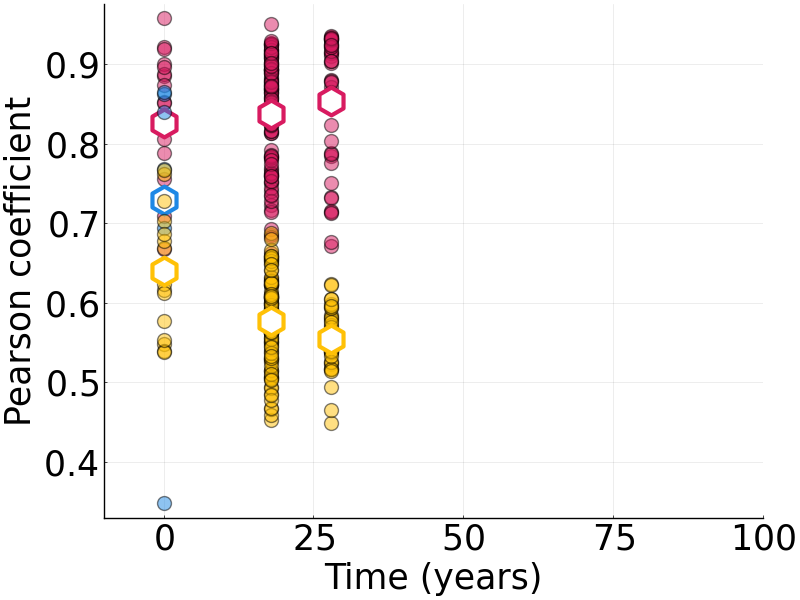

In [62]:
scatter()

scatter!([28.0], GSE43975_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], [GSE43975_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], GSE43975_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], [GSE43975_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([18.0], GSE154566_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE154566_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE154566_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE154566_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([0.0], GSE36642_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_dz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

### GSE61496

In [63]:
#load data
data = readdlm("GSE61496.csv", ',', '\n')
age_GSE61496 = readdlm("GSE61496.csv", ',', '\n')

3140×285 Matrix{Any}:
 ""            3076                    …  2090
 "sex"             "sex, 1=m, 2=f: 1"         "sex, 1=m, 2=f: 1"
 "pair id"       65                        117
 "age"           30                         74
 "ID_REF"          "GSM1506439"               "GSM1506366"
 "mob"             "SAMPLE 164"        …      "SAMPLE 91"
 "cg26594419"     0.499857                   0.530822
 "cg05618426"     0.49725                    0.50136
 "cg23331156"     0.492648                   0.550989
 "cg10809165"     0.618168                   0.748171
 "cg10395101"     0.612235             …     0.719372
 "cg12226717"     0.542644                   0.666957
 "cg02280132"     0.644303                   0.682451
 ⋮                                     ⋱  
 "cg24863544"     0.592299                   0.701704
 "cg24421397"     0.648989                   0.662372
 "cg16417409"     0.656467             …     0.494139
 "cg21806985"     0.633441                   0.556739
 "cg03568507"     0

In [64]:
df = DataFrame(data, :auto)
age_GSE61496 = DataFrame(data, :auto)

,x1,x2,x3,x4,x5
,Any,Any,Any,Any,Any
1,,3076,3114,1053,1054
2,sex,"sex, 1=m, 2=f: 1","sex, 1=m, 2=f: 1","sex, 1=m, 2=f: 2","sex, 1=m, 2=f: 2"
3,pair id,65,65,66,66
4,age,30,30,30,30
5,ID_REF,GSM1506439,GSM1506433,GSM1506440,GSM1506434
6,mob,SAMPLE 164,SAMPLE 158,SAMPLE 165,SAMPLE 159
7,cg26594419,0.499857,0.47257,0.495143,0.43703
8,cg05618426,0.49725,0.460007,0.502281,0.520062
9,cg23331156,0.492648,0.50579,0.55989,0.520055


In [65]:
age_GSE61496 = Matrix(age_GSE61496)

3140×285 Matrix{Any}:
 ""            3076                    …  2090
 "sex"             "sex, 1=m, 2=f: 1"         "sex, 1=m, 2=f: 1"
 "pair id"       65                        117
 "age"           30                         74
 "ID_REF"          "GSM1506439"               "GSM1506366"
 "mob"             "SAMPLE 164"        …      "SAMPLE 91"
 "cg26594419"     0.499857                   0.530822
 "cg05618426"     0.49725                    0.50136
 "cg23331156"     0.492648                   0.550989
 "cg10809165"     0.618168                   0.748171
 "cg10395101"     0.612235             …     0.719372
 "cg12226717"     0.542644                   0.666957
 "cg02280132"     0.644303                   0.682451
 ⋮                                     ⋱  
 "cg24863544"     0.592299                   0.701704
 "cg24421397"     0.648989                   0.662372
 "cg16417409"     0.656467             …     0.494139
 "cg21806985"     0.633441                   0.556739
 "cg03568507"     0

In [66]:
age_GSE61496 = age_GSE61496[4,:]

285-element Vector{Any}:
   "age"
 30
 30
 30
 30
 30
 30
 30
 30
 30
 30
 30
 30
  ⋮
 70
 70
 70
 70
 71
 71
 71
 71
 73
 74
 74
 74

In [67]:
age_GSE61496 = last(age_GSE61496, 284)

284-element Vector{Any}:
 30
 30
 30
 30
 30
 30
 30
 30
 30
 30
 30
 30
 30
  ⋮
 70
 70
 70
 70
 71
 71
 71
 71
 73
 74
 74
 74

In [68]:
df = df[Not([1,2,3,4,5]),:]

,x1,x2,x3,x4,x5,x6,x7
,Any,Any,Any,Any,Any,Any,Any
1,mob,SAMPLE 164,SAMPLE 158,SAMPLE 165,SAMPLE 159,SAMPLE 166,SAMPLE 160
2,cg26594419,0.499857,0.47257,0.495143,0.43703,0.444681,0.439234
3,cg05618426,0.49725,0.460007,0.502281,0.520062,0.53216,0.559984
4,cg23331156,0.492648,0.50579,0.55989,0.520055,0.538252,0.50398
5,cg10809165,0.618168,0.617077,0.525117,0.507138,0.604875,0.593645
6,cg10395101,0.612235,0.657227,0.666143,0.547188,0.68645,0.629861
7,cg12226717,0.542644,0.484685,0.422954,0.450171,0.393807,0.417642
8,cg02280132,0.644303,0.603416,0.631264,0.661448,0.649515,0.630462
9,cg13218688,0.58374,0.56837,0.453971,0.482736,0.659178,0.651786


In [69]:
df[1,1] = "fCpG"
df

,x1,x2,x3,x4,x5,x6,x7
,Any,Any,Any,Any,Any,Any,Any
1,fCpG,SAMPLE 164,SAMPLE 158,SAMPLE 165,SAMPLE 159,SAMPLE 166,SAMPLE 160
2,cg26594419,0.499857,0.47257,0.495143,0.43703,0.444681,0.439234
3,cg05618426,0.49725,0.460007,0.502281,0.520062,0.53216,0.559984
4,cg23331156,0.492648,0.50579,0.55989,0.520055,0.538252,0.50398
5,cg10809165,0.618168,0.617077,0.525117,0.507138,0.604875,0.593645
6,cg10395101,0.612235,0.657227,0.666143,0.547188,0.68645,0.629861
7,cg12226717,0.542644,0.484685,0.422954,0.450171,0.393807,0.417642
8,cg02280132,0.644303,0.603416,0.631264,0.661448,0.649515,0.630462
9,cg13218688,0.58374,0.56837,0.453971,0.482736,0.659178,0.651786


In [70]:
df = rename!(df, Symbol.(Vector(df[1,:])))[2:end,:]

,fCpG,SAMPLE 164,SAMPLE 158,SAMPLE 165,SAMPLE 159,SAMPLE 166,SAMPLE 160
,Any,Any,Any,Any,Any,Any,Any
1,cg26594419,0.499857,0.47257,0.495143,0.43703,0.444681,0.439234
2,cg05618426,0.49725,0.460007,0.502281,0.520062,0.53216,0.559984
3,cg23331156,0.492648,0.50579,0.55989,0.520055,0.538252,0.50398
4,cg10809165,0.618168,0.617077,0.525117,0.507138,0.604875,0.593645
5,cg10395101,0.612235,0.657227,0.666143,0.547188,0.68645,0.629861
6,cg12226717,0.542644,0.484685,0.422954,0.450171,0.393807,0.417642
7,cg02280132,0.644303,0.603416,0.631264,0.661448,0.649515,0.630462
8,cg13218688,0.58374,0.56837,0.453971,0.482736,0.659178,0.651786
9,cg24724587,0.642797,0.611657,0.730632,0.70126,0.621801,0.633515


In [71]:
df

,fCpG,SAMPLE 164,SAMPLE 158,SAMPLE 165,SAMPLE 159,SAMPLE 166,SAMPLE 160
,Any,Any,Any,Any,Any,Any,Any
1,cg26594419,0.499857,0.47257,0.495143,0.43703,0.444681,0.439234
2,cg05618426,0.49725,0.460007,0.502281,0.520062,0.53216,0.559984
3,cg23331156,0.492648,0.50579,0.55989,0.520055,0.538252,0.50398
4,cg10809165,0.618168,0.617077,0.525117,0.507138,0.604875,0.593645
5,cg10395101,0.612235,0.657227,0.666143,0.547188,0.68645,0.629861
6,cg12226717,0.542644,0.484685,0.422954,0.450171,0.393807,0.417642
7,cg02280132,0.644303,0.603416,0.631264,0.661448,0.649515,0.630462
8,cg13218688,0.58374,0.56837,0.453971,0.482736,0.659178,0.651786
9,cg24724587,0.642797,0.611657,0.730632,0.70126,0.621801,0.633515


In [72]:
fCpG_list = vec(readdlm("TmobT.csv", ',', '\n'))

3918-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg02280132"
 "cg13218688"
 "cg25001930"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg00543073"
 ⋮
 "cg24863544"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [73]:
list_to_keep = intersect(fCpG_list,df[:,1])

3134-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg02280132"
 "cg13218688"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg24817216"
 "cg26205981"
 ⋮
 "cg24863544"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [74]:
rows_to_keep = findall(in(list_to_keep),df[:,1])

3134-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
 3123
 3124
 3125
 3126
 3127
 3128
 3129
 3130
 3131
 3132
 3133
 3134

In [75]:
df = df[rows_to_keep,:]

,fCpG,SAMPLE 164,SAMPLE 158,SAMPLE 165,SAMPLE 159,SAMPLE 166,SAMPLE 160
,Any,Any,Any,Any,Any,Any,Any
1,cg26594419,0.499857,0.47257,0.495143,0.43703,0.444681,0.439234
2,cg05618426,0.49725,0.460007,0.502281,0.520062,0.53216,0.559984
3,cg23331156,0.492648,0.50579,0.55989,0.520055,0.538252,0.50398
4,cg10809165,0.618168,0.617077,0.525117,0.507138,0.604875,0.593645
5,cg10395101,0.612235,0.657227,0.666143,0.547188,0.68645,0.629861
6,cg12226717,0.542644,0.484685,0.422954,0.450171,0.393807,0.417642
7,cg02280132,0.644303,0.603416,0.631264,0.661448,0.649515,0.630462
8,cg13218688,0.58374,0.56837,0.453971,0.482736,0.659178,0.651786
9,cg24724587,0.642797,0.611657,0.730632,0.70126,0.621801,0.633515


In [76]:
df = df[:,Not(1)]

,SAMPLE 164,SAMPLE 158,SAMPLE 165,SAMPLE 159,SAMPLE 166,SAMPLE 160,SAMPLE 167
,Any,Any,Any,Any,Any,Any,Any
1,0.499857,0.47257,0.495143,0.43703,0.444681,0.439234,0.448566
2,0.49725,0.460007,0.502281,0.520062,0.53216,0.559984,0.528863
3,0.492648,0.50579,0.55989,0.520055,0.538252,0.50398,0.533167
4,0.618168,0.617077,0.525117,0.507138,0.604875,0.593645,0.585425
5,0.612235,0.657227,0.666143,0.547188,0.68645,0.629861,0.679535
6,0.542644,0.484685,0.422954,0.450171,0.393807,0.417642,0.457519
7,0.644303,0.603416,0.631264,0.661448,0.649515,0.630462,0.630531
8,0.58374,0.56837,0.453971,0.482736,0.659178,0.651786,0.561493
9,0.642797,0.611657,0.730632,0.70126,0.621801,0.633515,0.669305


In [77]:
df_values = df

,SAMPLE 164,SAMPLE 158,SAMPLE 165,SAMPLE 159,SAMPLE 166,SAMPLE 160,SAMPLE 167
,Any,Any,Any,Any,Any,Any,Any
1,0.499857,0.47257,0.495143,0.43703,0.444681,0.439234,0.448566
2,0.49725,0.460007,0.502281,0.520062,0.53216,0.559984,0.528863
3,0.492648,0.50579,0.55989,0.520055,0.538252,0.50398,0.533167
4,0.618168,0.617077,0.525117,0.507138,0.604875,0.593645,0.585425
5,0.612235,0.657227,0.666143,0.547188,0.68645,0.629861,0.679535
6,0.542644,0.484685,0.422954,0.450171,0.393807,0.417642,0.457519
7,0.644303,0.603416,0.631264,0.661448,0.649515,0.630462,0.630531
8,0.58374,0.56837,0.453971,0.482736,0.659178,0.651786,0.561493
9,0.642797,0.611657,0.730632,0.70126,0.621801,0.633515,0.669305


In [78]:
array_values = Matrix(df_values)

3134×284 Matrix{Any}:
 0.499857  0.47257   0.495143  0.43703   …  0.434573  0.454209  0.530822
 0.49725   0.460007  0.502281  0.520062     0.557883  0.482182  0.50136
 0.492648  0.50579   0.55989   0.520055     0.557641  0.660665  0.550989
 0.618168  0.617077  0.525117  0.507138     0.569277  0.635219  0.748171
 0.612235  0.657227  0.666143  0.547188     0.612263  0.705192  0.719372
 0.542644  0.484685  0.422954  0.450171  …  0.415812  0.458808  0.666957
 0.644303  0.603416  0.631264  0.661448     0.616568  0.619507  0.682451
 0.58374   0.56837   0.453971  0.482736     0.580805  0.582403  0.625598
 0.642797  0.611657  0.730632  0.70126      0.674316  0.579998  0.648061
 0.508796  0.463513  0.39463   0.520641     0.541455  0.418293  0.560422
 0.498513  0.441499  0.444219  0.452697  …  0.515966  0.425167  0.470421
 0.459157  0.471128  0.531919  0.396059     0.447507  0.579866  0.643122
 0.498475  0.518905  0.50866   0.501586     0.515061  0.479263  0.430573
 ⋮                            

In [79]:
parse.(Float64,string.(array_values))

3134×284 Matrix{Float64}:
 0.499857  0.47257   0.495143  0.43703   …  0.434573  0.454209  0.530822
 0.49725   0.460007  0.502281  0.520062     0.557883  0.482182  0.50136
 0.492648  0.50579   0.55989   0.520055     0.557641  0.660665  0.550989
 0.618168  0.617077  0.525117  0.507138     0.569277  0.635219  0.748171
 0.612235  0.657227  0.666143  0.547188     0.612263  0.705192  0.719372
 0.542644  0.484685  0.422954  0.450171  …  0.415812  0.458808  0.666957
 0.644303  0.603416  0.631264  0.661448     0.616568  0.619507  0.682451
 0.58374   0.56837   0.453971  0.482736     0.580805  0.582403  0.625598
 0.642797  0.611657  0.730632  0.70126      0.674316  0.579998  0.648061
 0.508796  0.463513  0.39463   0.520641     0.541455  0.418293  0.560422
 0.498513  0.441499  0.444219  0.452697  …  0.515966  0.425167  0.470421
 0.459157  0.471128  0.531919  0.396059     0.447507  0.579866  0.643122
 0.498475  0.518905  0.50866   0.501586     0.515061  0.479263  0.430573
 ⋮                        

In [80]:
pearson_values = cor(array_values)

284×284 Matrix{Float64}:
 1.0       0.840203  0.543498  0.592311  …  0.558795  0.400293  0.393746
 0.840203  1.0       0.555336  0.538363     0.564515  0.456506  0.404979
 0.543498  0.555336  1.0       0.720461     0.556621  0.440101  0.427154
 0.592311  0.538363  0.720461  1.0          0.531325  0.348751  0.374521
 0.542106  0.586107  0.552037  0.523114     0.552162  0.456015  0.426716
 0.571524  0.592436  0.582264  0.583893  …  0.567568  0.441948  0.402264
 0.512885  0.553487  0.543716  0.474784     0.547625  0.455719  0.403801
 0.571095  0.592465  0.529847  0.506905     0.553156  0.443479  0.390638
 0.565096  0.580363  0.56041   0.55837      0.562724  0.403298  0.354543
 0.572267  0.581112  0.565312  0.558372     0.58018   0.432218  0.384427
 0.537761  0.59205   0.549937  0.491853  …  0.541512  0.496236  0.414377
 0.441219  0.463043  0.491452  0.43697      0.469531  0.489207  0.468517
 0.496694  0.500644  0.527535  0.500833     0.524858  0.509218  0.479207
 ⋮                        

In [81]:
mz_comparisons = zeros(Integer(size(pearson_values,1)/2))
for i = 1:length(mz_comparisons)
    mz_comparisons[i] = pearson_values[2*i,2*i-1]
end
mz_comparisons

142-element Vector{Float64}:
 0.8402027564627977
 0.7204613008500756
 0.8055060197069377
 0.7463100738233925
 0.9136562420262455
 0.7655424676456885
 0.854396322731978
 0.7862005998151259
 0.6946575809533995
 0.8933843627466339
 0.5481254802777875
 0.896427875045961
 0.8789430097596872
 ⋮
 0.8414920318648473
 0.8744843271481049
 0.4264848493530771
 0.9176141302270105
 0.4012002351241854
 0.8906297906933891
 0.49305549724463393
 0.8576711464911844
 0.9306091296674098
 0.6202266890201105
 0.8617975506848726
 0.5379111262211049

In [82]:
mean(mz_comparisons)

0.75566930679109

In [83]:
ur_comparisons = zeros(Integer(size(pearson_values,1)/2)-1)
for i = 1:length(ur_comparisons)
    ur_comparisons[i] = pearson_values[2*i+1,2*i]
end
ur_comparisons

141-element Vector{Float64}:
 0.5553356778816672
 0.5231141460998446
 0.5525497954520253
 0.5503710333021722
 0.556198265639573
 0.5937572150665946
 0.51046088235733
 0.31046545322119323
 0.4582198690447537
 0.5678470732300849
 0.30156929592337517
 0.5617574062186976
 0.5853006311013097
 ⋮
 0.39139041151042436
 0.38092839780462207
 0.21188908462055192
 0.5353665301716514
 0.44933400628294107
 0.288231684487758
 0.506955499984563
 0.33999204047327375
 0.36391962031063313
 0.357621658966817
 0.34097815165908574
 0.45100906741001884

In [84]:
mean(ur_comparisons)

0.4621905592088697

In [85]:
GSE61496_mz = mz_comparisons
GSE61496_ur = ur_comparisons

141-element Vector{Float64}:
 0.5553356778816672
 0.5231141460998446
 0.5525497954520253
 0.5503710333021722
 0.556198265639573
 0.5937572150665946
 0.51046088235733
 0.31046545322119323
 0.4582198690447537
 0.5678470732300849
 0.30156929592337517
 0.5617574062186976
 0.5853006311013097
 ⋮
 0.39139041151042436
 0.38092839780462207
 0.21188908462055192
 0.5353665301716514
 0.44933400628294107
 0.288231684487758
 0.506955499984563
 0.33999204047327375
 0.36391962031063313
 0.357621658966817
 0.34097815165908574
 0.45100906741001884

In [86]:
age_GSE61496

284-element Vector{Any}:
 30
 30
 30
 30
 30
 30
 30
 30
 30
 30
 30
 30
 30
  ⋮
 70
 70
 70
 70
 71
 71
 71
 71
 73
 74
 74
 74

In [87]:
age_GSE61496 = age_GSE61496[1:2:end]

142-element Vector{Any}:
 30
 30
 30
 30
 30
 30
 30
 30
 31
 31
 31
 31
 31
  ⋮
 68
 68
 68
 69
 70
 70
 70
 70
 71
 71
 73
 74

In [88]:
age_GSE61496_mz = age_GSE61496

142-element Vector{Any}:
 30
 30
 30
 30
 30
 30
 30
 30
 31
 31
 31
 31
 31
  ⋮
 68
 68
 68
 69
 70
 70
 70
 70
 71
 71
 73
 74

In [89]:
age_GSE61496_ur = age_GSE61496[1:141]

141-element Vector{Any}:
 30
 30
 30
 30
 30
 30
 30
 30
 31
 31
 31
 31
 31
  ⋮
 68
 68
 68
 68
 69
 70
 70
 70
 70
 71
 71
 73

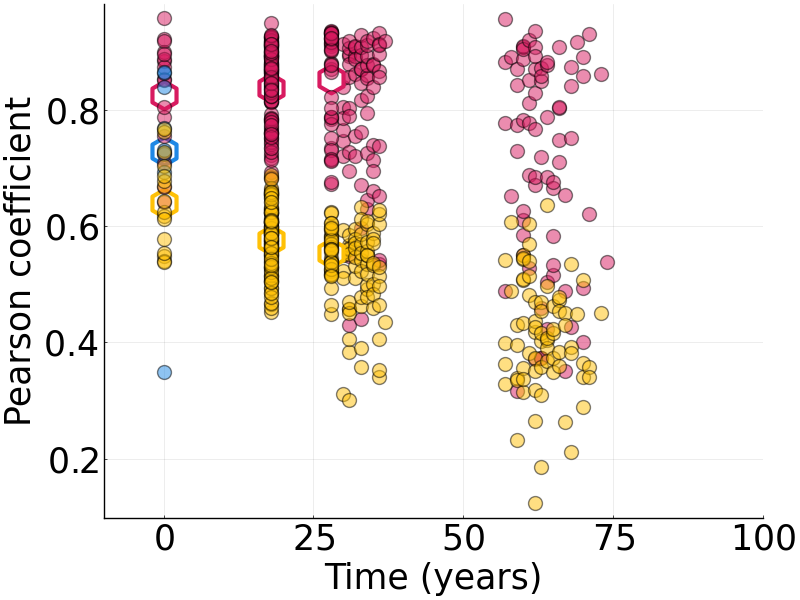

In [90]:
scatter()

scatter!(age_GSE61496, GSE61496_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(age_GSE61496_ur, GSE61496_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([28.0], [GSE43975_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], [GSE43975_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], GSE43975_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], GSE43975_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([18.0], [GSE154566_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE154566_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE154566_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE154566_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([0.0], [GSE36642_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_dz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

### GSE100227

In [91]:
#load data
data_mz = readdlm("GSE100227_MZ.csv", ',', '\n')
data_dz = readdlm("GSE100227_DZ.csv", ',', '\n')

3907×133 Matrix{Any}:
 ""             "GSM2675613"   "GSM2676058"  …   "GSM2675983"   "GSM2675995"
 ""             "Female"       "Female"          "Female"       "Female"
 ""             "F002"         "F002"            "F130"         "F130"
 ""             "DZ"           "DZ"              "DZ"           "DZ"
 "ID_REF"       "SAMPLE 2"     "SAMPLE 447"      "SAMPLE 372"   "SAMPLE 384"
 "cg26594419"  0.463163       0.51771        …  0.390024       0.379439
 "cg05618426"  0.550341       0.536325          0.49511        0.438473
 "cg23331156"  0.612476       0.483037          0.442294       0.557676
 "cg10809165"  0.525679       0.486883          0.461584       0.563915
 "cg10395101"  0.662498       0.575592          0.55116        0.514195
 "cg12226717"  0.489158       0.442576       …  0.328209       0.476239
 "cg02280132"  0.617547       0.691454          0.596574       0.59512
 "cg13218688"  0.634044       0.574184          0.531388       0.617977
 ⋮                                  

In [92]:
df_mz = DataFrame(data_mz, :auto)
df_dz = DataFrame(data_dz, :auto)

,x1,x2,x3,x4,x5,x6,x7
,Any,Any,Any,Any,Any,Any,Any
1,,GSM2675613,GSM2676058,GSM2675711,GSM2676021,GSM2675845,GSM2675891
2,,Female,Female,Female,Female,Female,Female
3,,F002,F002,F004,F004,F008,F008
4,,DZ,DZ,DZ,DZ,DZ,DZ
5,ID_REF,SAMPLE 2,SAMPLE 447,SAMPLE 100,SAMPLE 410,SAMPLE 234,SAMPLE 280
6,cg26594419,0.463163,0.51771,0.43387,0.442174,0.417573,0.415841
7,cg05618426,0.550341,0.536325,0.520619,0.517771,0.510581,0.459733
8,cg23331156,0.612476,0.483037,0.532919,0.597323,0.440804,0.556893
9,cg10809165,0.525679,0.486883,0.590705,0.566082,0.395818,0.57685


In [93]:
df_mz = df_mz[Not(1,2,3,4,5),:]
df_dz = df_dz[Not(1,2,3,4,5),:]

,x1,x2,x3,x4,x5,x6,x7,x8
,Any,Any,Any,Any,Any,Any,Any,Any
1,cg26594419,0.463163,0.51771,0.43387,0.442174,0.417573,0.415841,0.465503
2,cg05618426,0.550341,0.536325,0.520619,0.517771,0.510581,0.459733,0.599996
3,cg23331156,0.612476,0.483037,0.532919,0.597323,0.440804,0.556893,0.471849
4,cg10809165,0.525679,0.486883,0.590705,0.566082,0.395818,0.57685,0.609455
5,cg10395101,0.662498,0.575592,0.498768,0.537247,0.580641,0.551411,0.561125
6,cg12226717,0.489158,0.442576,0.42044,0.49639,0.677381,0.486549,0.466124
7,cg02280132,0.617547,0.691454,0.635569,0.534989,0.743799,0.61554,0.73031
8,cg13218688,0.634044,0.574184,0.533137,0.583145,0.585118,0.642707,0.533927
9,cg25001930,0.695756,0.546417,0.552451,0.490646,0.403784,0.548052,0.694694


In [94]:
fCpG_list = vec(readdlm("TmobT.csv", ',', '\n'))

3918-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg02280132"
 "cg13218688"
 "cg25001930"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg00543073"
 ⋮
 "cg24863544"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [95]:
list_to_keep = intersect(fCpG_list,df_mz[:,1])

3902-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg02280132"
 "cg13218688"
 "cg25001930"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg00543073"
 ⋮
 "cg24863544"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [96]:
list_to_keep = intersect(fCpG_list,df_dz[:,1])

3902-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg02280132"
 "cg13218688"
 "cg25001930"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg00543073"
 ⋮
 "cg24863544"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [97]:
df_mz_values = df_mz[:,Not(1)]
df_dz_values = df_dz[:,Not(1)]

,x2,x3,x4,x5,x6,x7,x8,x9
,Any,Any,Any,Any,Any,Any,Any,Any
1,0.463163,0.51771,0.43387,0.442174,0.417573,0.415841,0.465503,0.411033
2,0.550341,0.536325,0.520619,0.517771,0.510581,0.459733,0.599996,0.618764
3,0.612476,0.483037,0.532919,0.597323,0.440804,0.556893,0.471849,0.551249
4,0.525679,0.486883,0.590705,0.566082,0.395818,0.57685,0.609455,0.624932
5,0.662498,0.575592,0.498768,0.537247,0.580641,0.551411,0.561125,0.537306
6,0.489158,0.442576,0.42044,0.49639,0.677381,0.486549,0.466124,0.513863
7,0.617547,0.691454,0.635569,0.534989,0.743799,0.61554,0.73031,0.643708
8,0.634044,0.574184,0.533137,0.583145,0.585118,0.642707,0.533927,0.558518
9,0.695756,0.546417,0.552451,0.490646,0.403784,0.548052,0.694694,0.505493


In [98]:
array_values_mz = Matrix(df_mz_values)
array_values_dz = Matrix(df_dz_values)

3902×132 Matrix{Any}:
 0.463163  0.51771   0.43387   0.442174  …  0.412243  0.390024  0.379439
 0.550341  0.536325  0.520619  0.517771     0.526134  0.49511   0.438473
 0.612476  0.483037  0.532919  0.597323     0.393928  0.442294  0.557676
 0.525679  0.486883  0.590705  0.566082     0.449609  0.461584  0.563915
 0.662498  0.575592  0.498768  0.537247     0.547031  0.55116   0.514195
 0.489158  0.442576  0.42044   0.49639   …  0.419165  0.328209  0.476239
 0.617547  0.691454  0.635569  0.534989     0.624396  0.596574  0.59512
 0.634044  0.574184  0.533137  0.583145     0.537627  0.531388  0.617977
 0.695756  0.546417  0.552451  0.490646     0.461149  0.371978  0.62511
 0.59408   0.609205  0.627394  0.636023     0.677865  0.473218  0.668045
 0.529775  0.508908  0.627093  0.578922  …  0.515549  0.372634  0.604074
 0.424368  0.449154  0.331665  0.311401     0.410317  0.418392  0.481657
 0.459193  0.491301  0.418994  0.409815     0.506358  0.406183  0.444549
 ⋮                             

In [99]:
parse.(Float64,string.(array_values_mz))
parse.(Float64,string.(array_values_dz))

3902×132 Matrix{Float64}:
 0.463163  0.51771   0.43387   0.442174  …  0.412243  0.390024  0.379439
 0.550341  0.536325  0.520619  0.517771     0.526134  0.49511   0.438473
 0.612476  0.483037  0.532919  0.597323     0.393928  0.442294  0.557676
 0.525679  0.486883  0.590705  0.566082     0.449609  0.461584  0.563915
 0.662498  0.575592  0.498768  0.537247     0.547031  0.55116   0.514195
 0.489158  0.442576  0.42044   0.49639   …  0.419165  0.328209  0.476239
 0.617547  0.691454  0.635569  0.534989     0.624396  0.596574  0.59512
 0.634044  0.574184  0.533137  0.583145     0.537627  0.531388  0.617977
 0.695756  0.546417  0.552451  0.490646     0.461149  0.371978  0.62511
 0.59408   0.609205  0.627394  0.636023     0.677865  0.473218  0.668045
 0.529775  0.508908  0.627093  0.578922  …  0.515549  0.372634  0.604074
 0.424368  0.449154  0.331665  0.311401     0.410317  0.418392  0.481657
 0.459193  0.491301  0.418994  0.409815     0.506358  0.406183  0.444549
 ⋮                         

In [100]:
pearson_values_mz = cor(array_values_mz)
pearson_values_dz = cor(array_values_dz)

132×132 Matrix{Float64}:
 1.0       0.5966    0.52434   0.555201  …  0.519823  0.466665  0.589716
 0.5966    1.0       0.531985  0.576051     0.52088   0.462229  0.589843
 0.52434   0.531985  1.0       0.54286      0.492771  0.446827  0.528121
 0.555201  0.576051  0.54286   1.0          0.57875   0.508355  0.59817
 0.448144  0.472506  0.42264   0.467297     0.431097  0.383624  0.494618
 0.571203  0.56607   0.539657  0.621706  …  0.633542  0.536398  0.592795
 0.571731  0.583706  0.491048  0.548347     0.502539  0.466856  0.597694
 0.520763  0.515484  0.469643  0.525654     0.478995  0.474315  0.520202
 0.549645  0.556804  0.496144  0.527886     0.513711  0.447668  0.575639
 0.613894  0.613894  0.556023  0.587535     0.57077   0.491522  0.631926
 0.545112  0.531083  0.459937  0.513852  …  0.569772  0.48704   0.556316
 0.557074  0.545993  0.472038  0.535939     0.569811  0.507696  0.573143
 0.562133  0.567244  0.514824  0.531898     0.502594  0.437458  0.566236
 ⋮                         

In [101]:
mz_comparisons = zeros(Integer(size(pearson_values_mz,1)/2))
for i = 1:length(mz_comparisons)
    mz_comparisons[i] = pearson_values_mz[2*i,2*i-1]
end
mz_comparisons

65-element Vector{Float64}:
 0.7274094168357742
 0.8712931027974771
 0.8165661458067568
 0.7526718351684046
 0.6235735822584889
 0.8761289368908222
 0.7769282767814206
 0.76005137415176
 0.5476690234537571
 0.649153543179811
 0.8782060817593141
 0.7642629423666994
 0.5135497247420475
 ⋮
 0.8543279265751431
 0.6010541698765778
 0.8409917010641337
 0.6633797387973587
 0.703555496677172
 0.8508897816185039
 0.5346615276836318
 0.6630936726938196
 0.7644400180726809
 0.7488679507812792
 0.6062919325747739
 0.8532686010970058

In [102]:
mean(mz_comparisons)

0.7201883617361703

In [103]:
dz_comparisons = zeros(Integer(size(pearson_values_dz,1)/2))
for i = 1:length(dz_comparisons)
    dz_comparisons[i] = pearson_values_dz[2*i,2*i-1]
end
dz_comparisons

66-element Vector{Float64}:
 0.5965997556350716
 0.5428596922030353
 0.522536080148244
 0.46916129130797213
 0.6787252720951636
 0.8468802490587439
 0.45070312733039725
 0.42235093681038516
 0.5620230673413141
 0.6709944526148874
 0.516637105401288
 0.5757121237908228
 0.6016822528146079
 ⋮
 0.5426847104486031
 0.5056594500640212
 0.8508188303601797
 0.5499296651613013
 0.5261019834284804
 0.5639217285994614
 0.49717457632214507
 0.4948857107037544
 0.4773369950951455
 0.5255513664105667
 0.5899797480177146
 0.49021009382445135

In [104]:
mean(dz_comparisons)

0.5438530036099151

In [105]:
ur_comparisons = zeros(Integer(size(pearson_values_mz,1)/2)-1)
for i = 1:length(ur_comparisons)
    ur_comparisons[i] = pearson_values_mz[2*i+1,2*i]
end
ur_comparisons

64-element Vector{Float64}:
 0.5648340602022219
 0.5726879819161551
 0.5145402075414434
 0.5182677899105126
 0.6356318609663938
 0.6419087025275368
 0.5806314770793738
 0.514754452356278
 0.592316858064131
 0.5279300247189689
 0.6052443330908349
 0.6191190320446553
 0.6160553315072085
 ⋮
 0.6281856251253847
 0.5522689646355748
 0.6277842034920544
 0.5827282362701185
 0.5944296788947284
 0.5980583067441522
 0.4694584813332427
 0.34843162963237656
 0.5914836010971181
 0.5545400082263788
 0.6248624535779277
 0.5274465431798033

In [106]:
mean(ur_comparisons)

0.5573075267798997

In [107]:
GSE100227_mz_mean = mean(mz_comparisons)
GSE100227_mz = mz_comparisons
GSE100227_dz_mean = mean(dz_comparisons)
GSE100227_dz = dz_comparisons
GSE100227_ur_mean = mean(ur_comparisons)
GSE100227_ur = ur_comparisons

64-element Vector{Float64}:
 0.5648340602022219
 0.5726879819161551
 0.5145402075414434
 0.5182677899105126
 0.6356318609663938
 0.6419087025275368
 0.5806314770793738
 0.514754452356278
 0.592316858064131
 0.5279300247189689
 0.6052443330908349
 0.6191190320446553
 0.6160553315072085
 ⋮
 0.6281856251253847
 0.5522689646355748
 0.6277842034920544
 0.5827282362701185
 0.5944296788947284
 0.5980583067441522
 0.4694584813332427
 0.34843162963237656
 0.5914836010971181
 0.5545400082263788
 0.6248624535779277
 0.5274465431798033

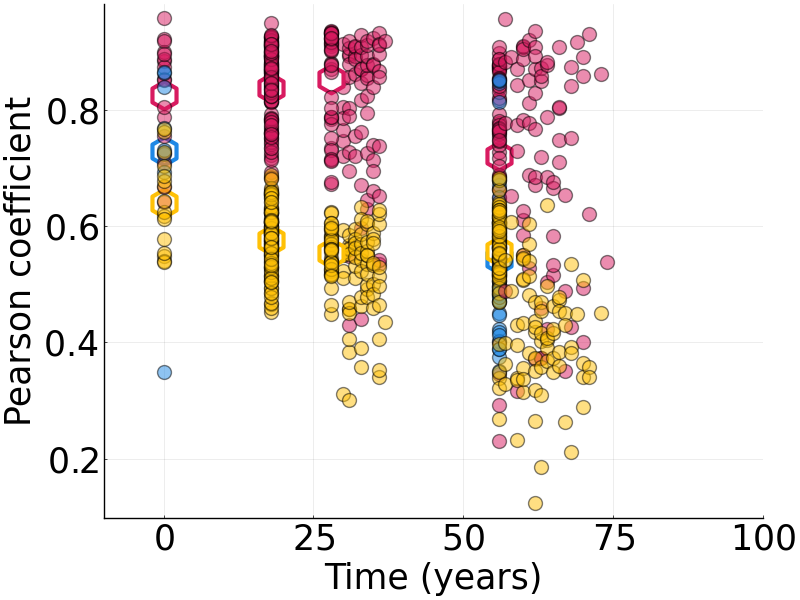

In [108]:
scatter()

scatter!([56.0], [GSE100227_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], [GSE100227_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], [GSE100227_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], GSE100227_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], GSE100227_dz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], GSE100227_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!(age_GSE61496, GSE61496_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(age_GSE61496_ur, GSE61496_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([28.0], [GSE43975_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], [GSE43975_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], GSE43975_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], GSE43975_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([18.0], [GSE154566_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE154566_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE154566_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE154566_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([0.0], [GSE36642_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_dz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

### GSE89093

In [109]:
#load data
data = readdlm("GSE89093.csv", ',', '\n')

11857×93 Matrix{Any}:
 ""              "healthy"       "cancer-diagnosis"  …    "cancer-diagnosis"
 ""            -3.36           -3.36                    -2.07
 ""              "female"        "female"                 "female"
 ""              "pair_38"       "pair_38"                "pair_10"
 ""            73.14           73.14                    59.5
 "ID_REF"        "GSM2358635"    "GSM2358642"        …    "GSM2358720"
 "cg00001261"   0.4492          0.58161                  0.349539
 "cg00003818"   0.437458        0.43433                  0.563623
 "cg00003900"   0.417424        0.313071                 0.518234
 "cg00007810"   0.653846        0.687702                 0.398979
 "cg00009088"   0.489918        0.598123             …   0.470717
 "cg00010078"   0.553302        0.602971                 0.526625
 "cg00010954"   0.444901        0.552456                 0.55467
 ⋮                                                   ⋱  
 "cg07499142"   0.441785        0.508352             …

In [110]:
df = DataFrame(data, :auto)
age_GSE89093 =  DataFrame(data, :auto)

,x1,x2,x3,x4,x5,x6
,Any,Any,Any,Any,Any,Any
1,,healthy,cancer-diagnosis,cancer-diagnosis,healthy,healthy
2,,-3.36,-3.36,-2.35,-2.35,-4.55
3,,female,female,female,female,female
4,,pair_38,pair_38,pair_43,pair_43,pair_17
5,,73.14,73.14,65.18,65.18,75.7
6,ID_REF,GSM2358635,GSM2358642,GSM2358636,GSM2358637,GSM2358638
7,cg00001261,0.4492,0.58161,0.44907,0.452598,0.574513
8,cg00003818,0.437458,0.43433,0.522611,0.500276,0.318957
9,cg00003900,0.417424,0.313071,0.308664,0.305451,0.51485


In [111]:
age_GSE89093 = Matrix(age_GSE89093)

11857×93 Matrix{Any}:
 ""              "healthy"       "cancer-diagnosis"  …    "cancer-diagnosis"
 ""            -3.36           -3.36                    -2.07
 ""              "female"        "female"                 "female"
 ""              "pair_38"       "pair_38"                "pair_10"
 ""            73.14           73.14                    59.5
 "ID_REF"        "GSM2358635"    "GSM2358642"        …    "GSM2358720"
 "cg00001261"   0.4492          0.58161                  0.349539
 "cg00003818"   0.437458        0.43433                  0.563623
 "cg00003900"   0.417424        0.313071                 0.518234
 "cg00007810"   0.653846        0.687702                 0.398979
 "cg00009088"   0.489918        0.598123             …   0.470717
 "cg00010078"   0.553302        0.602971                 0.526625
 "cg00010954"   0.444901        0.552456                 0.55467
 ⋮                                                   ⋱  
 "cg07499142"   0.441785        0.508352             …

In [112]:
age_GSE89093 = age_GSE89093[5,Not(1)]

92-element Vector{Any}:
 73.14
 73.14
 65.18
 65.18
 75.7
 75.7
 49.1
 49.1
 62.89
 62.89
 67.58
 67.58
 42.55
  ⋮
 58.6
 58.6
 73.3
 73.3
 72.9
 72.9
 44
 44
 56.6
 56.6
 59.5
 59.5

In [113]:
maximum(age_GSE89093)

78.7

In [114]:
minimum(age_GSE89093)

38.1

In [115]:
df = df[Not(1,2,3,4,5,6),:]

,x1,x2,x3,x4,x5,x6,x7,x8
,Any,Any,Any,Any,Any,Any,Any,Any
1,cg00001261,0.4492,0.58161,0.44907,0.452598,0.574513,0.552921,0.50574
2,cg00003818,0.437458,0.43433,0.522611,0.500276,0.318957,0.342741,0.344544
3,cg00003900,0.417424,0.313071,0.308664,0.305451,0.51485,0.451567,0.455894
4,cg00007810,0.653846,0.687702,0.649696,0.669954,0.64898,0.672676,0.71713
5,cg00009088,0.489918,0.598123,0.408874,0.377583,0.354696,0.412261,0.42198
6,cg00010078,0.553302,0.602971,0.400076,0.389571,0.420318,0.458694,0.515153
7,cg00010954,0.444901,0.552456,0.469697,0.498525,0.327801,0.440337,0.451098
8,cg00011856,0.541802,0.737494,0.668981,0.641716,0.600608,0.669996,0.741661
9,cg00011924,0.409344,0.396616,0.51412,0.495711,0.260295,0.35203,0.513478


In [116]:
fCpG_list = vec(readdlm("TmobT.csv", ',', '\n'))

3918-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg02280132"
 "cg13218688"
 "cg25001930"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg00543073"
 ⋮
 "cg24863544"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [117]:
list_to_keep = intersect(fCpG_list,df[:,1])

3833-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg02280132"
 "cg13218688"
 "cg25001930"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg00543073"
 ⋮
 "cg24863544"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [118]:
rows_to_keep = findall(in(list_to_keep),df[:,1])

3833-element Vector{Int64}:
     1
     2
     3
     8
     9
    19
    22
    24
    28
    30
    38
    39
    40
     ⋮
 11808
 11812
 11820
 11823
 11830
 11831
 11832
 11837
 11844
 11847
 11850
 11851

In [119]:
df = df[rows_to_keep,:]

,x1,x2,x3,x4,x5,x6,x7,x8
,Any,Any,Any,Any,Any,Any,Any,Any
1,cg00001261,0.4492,0.58161,0.44907,0.452598,0.574513,0.552921,0.50574
2,cg00003818,0.437458,0.43433,0.522611,0.500276,0.318957,0.342741,0.344544
3,cg00003900,0.417424,0.313071,0.308664,0.305451,0.51485,0.451567,0.455894
4,cg00011856,0.541802,0.737494,0.668981,0.641716,0.600608,0.669996,0.741661
5,cg00011924,0.409344,0.396616,0.51412,0.495711,0.260295,0.35203,0.513478
6,cg00036723,0.521224,0.373822,0.367161,0.361001,0.479577,0.430686,0.469603
7,cg00044354,0.643907,0.480003,0.469917,0.499568,0.582307,0.434647,0.424371
8,cg00045910,0.288196,0.455559,0.425049,0.435758,0.187484,0.35156,0.660047
9,cg00056066,0.445613,0.685413,0.539654,0.53813,0.43809,0.554993,0.596001


In [120]:
df_values = df[:,Not(1)]

,x2,x3,x4,x5,x6,x7,x8,x9
,Any,Any,Any,Any,Any,Any,Any,Any
1,0.4492,0.58161,0.44907,0.452598,0.574513,0.552921,0.50574,0.512501
2,0.437458,0.43433,0.522611,0.500276,0.318957,0.342741,0.344544,0.345457
3,0.417424,0.313071,0.308664,0.305451,0.51485,0.451567,0.455894,0.439642
4,0.541802,0.737494,0.668981,0.641716,0.600608,0.669996,0.741661,0.853876
5,0.409344,0.396616,0.51412,0.495711,0.260295,0.35203,0.513478,0.547741
6,0.521224,0.373822,0.367161,0.361001,0.479577,0.430686,0.469603,0.428862
7,0.643907,0.480003,0.469917,0.499568,0.582307,0.434647,0.424371,0.425518
8,0.288196,0.455559,0.425049,0.435758,0.187484,0.35156,0.660047,0.649436
9,0.445613,0.685413,0.539654,0.53813,0.43809,0.554993,0.596001,0.592493


In [121]:
array_values = Matrix(df_values)

3833×92 Matrix{Any}:
 0.4492    0.58161   0.44907   0.452598  …  0.439199  0.346829  0.349539
 0.437458  0.43433   0.522611  0.500276     0.430218  0.561741  0.563623
 0.417424  0.313071  0.308664  0.305451     0.464695  0.53183   0.518234
 0.541802  0.737494  0.668981  0.641716     0.676631  0.568061  0.643425
 0.409344  0.396616  0.51412   0.495711     0.379066  0.333309  0.37542
 0.521224  0.373822  0.367161  0.361001  …  0.497993  0.534867  0.544176
 0.643907  0.480003  0.469917  0.499568     0.691025  0.671817  0.68724
 0.288196  0.455559  0.425049  0.435758     0.531295  0.467635  0.504215
 0.445613  0.685413  0.539654  0.53813      0.548615  0.498784  0.577953
 0.497649  0.614419  0.556329  0.569869     0.49299   0.374021  0.390852
 0.721574  0.621859  0.517717  0.549564  …  0.677618  0.756846  0.790526
 0.569368  0.617137  0.531398  0.520871     0.610291  0.601201  0.613125
 0.495243  0.531779  0.481034  0.494199     0.560263  0.657622  0.64459
 ⋮                               

In [122]:
parse.(Float64,string.(array_values))

3833×92 Matrix{Float64}:
 0.4492    0.58161   0.44907   0.452598  …  0.439199  0.346829  0.349539
 0.437458  0.43433   0.522611  0.500276     0.430218  0.561741  0.563623
 0.417424  0.313071  0.308664  0.305451     0.464695  0.53183   0.518234
 0.541802  0.737494  0.668981  0.641716     0.676631  0.568061  0.643425
 0.409344  0.396616  0.51412   0.495711     0.379066  0.333309  0.37542
 0.521224  0.373822  0.367161  0.361001  …  0.497993  0.534867  0.544176
 0.643907  0.480003  0.469917  0.499568     0.691025  0.671817  0.68724
 0.288196  0.455559  0.425049  0.435758     0.531295  0.467635  0.504215
 0.445613  0.685413  0.539654  0.53813      0.548615  0.498784  0.577953
 0.497649  0.614419  0.556329  0.569869     0.49299   0.374021  0.390852
 0.721574  0.621859  0.517717  0.549564  …  0.677618  0.756846  0.790526
 0.569368  0.617137  0.531398  0.520871     0.610291  0.601201  0.613125
 0.495243  0.531779  0.481034  0.494199     0.560263  0.657622  0.64459
 ⋮                           

In [123]:
pearson_values = cor(array_values)

92×92 Matrix{Float64}:
 1.0       0.399266  0.292111  0.290449  …  0.392886  0.280499  0.291404
 0.399266  1.0       0.483414  0.477451     0.413887  0.235668  0.297486
 0.292111  0.483414  1.0       0.948726     0.464856  0.316607  0.313227
 0.290449  0.477451  0.948726  1.0          0.477444  0.335921  0.327296
 0.184149  0.257903  0.364046  0.373709     0.26769   0.212743  0.199943
 0.264464  0.404221  0.528044  0.530648  …  0.422086  0.305704  0.310611
 0.340183  0.445679  0.499842  0.510825     0.488431  0.343858  0.341925
 0.323825  0.446808  0.483928  0.487322     0.444587  0.309649  0.317363
 0.3542    0.480168  0.634761  0.644211     0.561723  0.410011  0.405095
 0.228651  0.30528   0.404681  0.425538     0.394858  0.28393   0.280944
 0.340778  0.453052  0.565451  0.583552  …  0.524311  0.376277  0.360059
 0.264194  0.327156  0.408489  0.419507     0.372767  0.258489  0.258288
 0.261567  0.438303  0.649247  0.646765     0.399722  0.340617  0.334187
 ⋮                          

In [124]:
mz_comparisons = zeros(Integer(size(pearson_values,1)/2))
for i = 1:length(mz_comparisons)
    mz_comparisons[i] = pearson_values[2*i,2*i-1]
end
mz_comparisons

46-element Vector{Float64}:
 0.39926635165757385
 0.9487264428196511
 0.4585315934123526
 0.94430830434293
 0.59020786093157
 0.5613619114358765
 0.7806999186591268
 0.9276031347231752
 0.45183334887540694
 0.8722327943949115
 0.9126777783898141
 0.8813214263882901
 0.6268780905988636
 ⋮
 0.48059933966917234
 0.9216309808792551
 0.8496822543343663
 0.537606551718549
 0.9277141435803796
 0.7718621188690504
 0.928418226092551
 0.7177779480784678
 0.8996732062173279
 0.908861802898913
 0.9129405151057953
 0.9381717751217588

In [125]:
mean(mz_comparisons)

0.7576377384675096

In [126]:
ur_comparisons = zeros(Integer(size(pearson_values,1)/2)-1)
for i = 1:length(ur_comparisons)
    ur_comparisons[i] = pearson_values[2*i+1,2*i]
end
ur_comparisons

45-element Vector{Float64}:
 0.483413746386194
 0.3737090677918821
 0.4272435428209797
 0.49272296005132304
 0.4011075100946068
 0.36217963680110943
 0.5495842369575842
 0.3447266429796235
 0.3929248426119983
 0.5068403971920744
 0.4854256158729197
 0.45330446809448627
 0.4497261143073798
 ⋮
 0.5283394541460953
 0.3599771171996282
 0.5860764774076135
 0.340942163082079
 0.17277288321978715
 0.22447911527738615
 0.573888456536666
 0.4971981215720766
 0.3615111033246969
 0.4841321292600185
 0.49492421494812744
 0.4128141228420465

In [127]:
mean(ur_comparisons)

0.4377961212335898

In [128]:
GSE89093_mz_mean = mean(mz_comparisons)
GSE89093_mz = mz_comparisons
GSE89093_ur_mean = mean(ur_comparisons)
GSE89093_ur = ur_comparisons

45-element Vector{Float64}:
 0.483413746386194
 0.3737090677918821
 0.4272435428209797
 0.49272296005132304
 0.4011075100946068
 0.36217963680110943
 0.5495842369575842
 0.3447266429796235
 0.3929248426119983
 0.5068403971920744
 0.4854256158729197
 0.45330446809448627
 0.4497261143073798
 ⋮
 0.5283394541460953
 0.3599771171996282
 0.5860764774076135
 0.340942163082079
 0.17277288321978715
 0.22447911527738615
 0.573888456536666
 0.4971981215720766
 0.3615111033246969
 0.4841321292600185
 0.49492421494812744
 0.4128141228420465

In [129]:
age_GSE89093

92-element Vector{Any}:
 73.14
 73.14
 65.18
 65.18
 75.7
 75.7
 49.1
 49.1
 62.89
 62.89
 67.58
 67.58
 42.55
  ⋮
 58.6
 58.6
 73.3
 73.3
 72.9
 72.9
 44
 44
 56.6
 56.6
 59.5
 59.5

In [130]:
age_GSE89093_mz = age_GSE89093[1:2:end]

46-element Vector{Any}:
 73.14
 65.18
 75.7
 49.1
 62.89
 67.58
 42.55
 49.4
 59.6
 50.3
 56.87
 68.13
 71.5
  ⋮
 58.7
 64.3
 41.5
 71.1
 62.7
 70.3
 58.6
 73.3
 72.9
 44
 56.6
 59.5

In [131]:
age_GSE89093_ur_1 = age_GSE89093_mz[1:45]
age_GSE89093_ur_2 = age_GSE89093_mz[2:46]
age_GSE89093_ur = (age_GSE89093_ur_1 + age_GSE89093_ur_2)./2

45-element Vector{Float64}:
 69.16
 70.44
 62.400000000000006
 55.995000000000005
 65.235
 55.065
 45.974999999999994
 54.5
 54.95
 53.584999999999994
 62.5
 69.815
 67.05
  ⋮
 60.45
 61.5
 52.9
 56.3
 66.9
 66.5
 64.45
 65.95
 73.1
 58.45
 50.3
 58.05

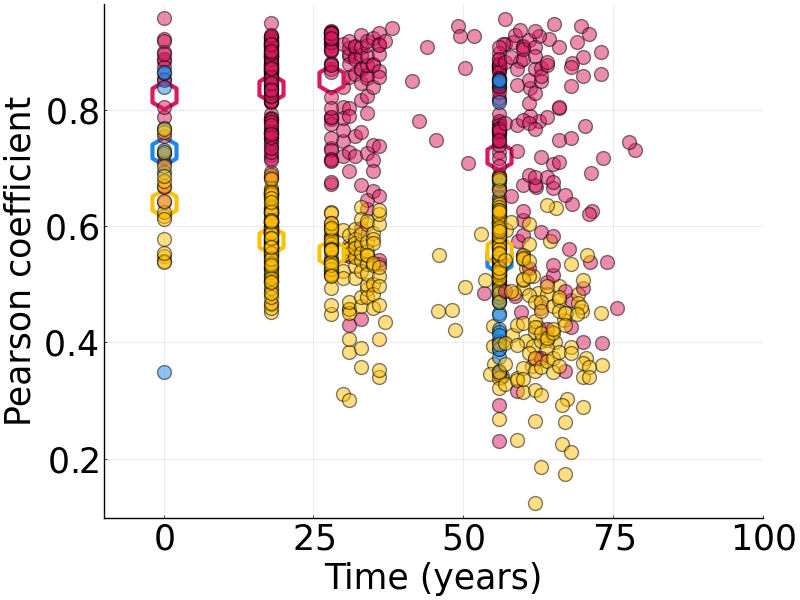

In [132]:
scatter()

scatter!(age_GSE89093_mz, GSE89093_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(age_GSE89093_ur, GSE89093_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([56.0], [GSE100227_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], [GSE100227_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], [GSE100227_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], GSE100227_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], GSE100227_dz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], GSE100227_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!(age_GSE61496_mz, GSE61496_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(age_GSE61496_ur, GSE61496_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([28.0], [GSE43975_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], [GSE43975_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], GSE43975_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], GSE43975_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([18.0], [GSE154566_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE154566_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE154566_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE154566_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([0.0], [GSE36642_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_dz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

### GSE105018

In [133]:
#load data
data_mz = readdlm("GSE105018_MZ.csv", ',', '\n')
data_dz = readdlm("GSE105018_DZ.csv", ',', '\n')

286×613 Matrix{Any}:
 "family"       339              …   73               73
 "twin#"          1                   1                2
 "gender"          "F"                 "M"              "M"
 "twin type"       "DZ"                "DZ"             "DZ"
 "ID_REF"          "GSM2814054"        "GSM2815677"     "GSM2815678"
 "twin"        3391              …  731              732
 "cg04863005"     0.667017            0.589106         0.650199
 "cg22082780"     0.285411            0.392122         0.344554
 "cg11540476"     0.636071            0.740043         0.73227
 "cg25459280"     0.398429            0.56512          0.462175
 "cg21297282"     0.716363       …    0.528475         0.664336
 "cg00101728"     0.609841            0.313218         0.185146
 "cg18770216"     0.37698             0.519387         0.372683
 ⋮                               ⋱                   
 "cg19277154"     0.399648            0.419778         0.451843
 "cg04487205"     0.499368       …    0.33737        

In [134]:
df_mz = DataFrame(data_mz, :auto)
df_dz = DataFrame(data_dz, :auto)

,x1,x2,x3,x4,x5,x6,x7
,Any,Any,Any,Any,Any,Any,Any
1,family,339,339,343,343,344,344
2,twin#,1,2,1,2,1,2
3,gender,F,F,M,M,F,F
4,twin type,DZ,DZ,DZ,DZ,DZ,DZ
5,ID_REF,GSM2814054,GSM2814055,GSM2814062,GSM2814063,GSM2814064,GSM2814065
6,twin,3391,3392,3431,3432,3441,3442
7,cg04863005,0.667017,0.370206,0.411899,0.428538,0.620253,0.354687
8,cg22082780,0.285411,0.236331,0.285559,0.336084,0.664687,0.64316
9,cg11540476,0.636071,0.615258,0.658995,0.685312,0.694632,0.711937


In [135]:
df_mz = df_mz[Not(1,2,3,4,5,6),:]
df_dz = df_dz[Not(1,2,3,4,5,6),:]

,x1,x2,x3,x4,x5,x6,x7,x8
,Any,Any,Any,Any,Any,Any,Any,Any
1,cg04863005,0.667017,0.370206,0.411899,0.428538,0.620253,0.354687,0.575565
2,cg22082780,0.285411,0.236331,0.285559,0.336084,0.664687,0.64316,0.329729
3,cg11540476,0.636071,0.615258,0.658995,0.685312,0.694632,0.711937,0.77008
4,cg25459280,0.398429,0.581548,0.675166,0.726221,0.533212,0.544167,0.51874
5,cg21297282,0.716363,0.375691,0.601128,0.536638,0.545472,0.357772,0.626378
6,cg00101728,0.609841,0.646937,0.43793,0.438081,0.452526,0.417851,0.48609
7,cg18770216,0.37698,0.360622,0.349046,0.376515,0.501333,0.526483,0.401367
8,cg14762436,0.40533,0.406118,0.217492,0.383737,0.600435,0.528473,0.594318
9,cg05636467,0.465205,0.561874,0.66472,0.577041,0.481135,0.482627,0.56348


In [136]:
fCpG_list = vec(readdlm("TmobT.csv", ',', '\n'))

3918-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg02280132"
 "cg13218688"
 "cg25001930"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg00543073"
 ⋮
 "cg24863544"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [137]:
list_to_keep = intersect(fCpG_list,df_mz[:,1])

280-element Vector{Any}:
 "cg25001930"
 "cg09100338"
 "cg18675097"
 "cg27385590"
 "cg05371552"
 "cg18367631"
 "cg21104965"
 "cg27160395"
 "cg07241675"
 "cg13944111"
 "cg15455643"
 "cg00846036"
 "cg07876162"
 ⋮
 "cg26743132"
 "cg00600477"
 "cg00388287"
 "cg02883147"
 "cg25456020"
 "cg09663343"
 "cg10087780"
 "cg27551227"
 "cg00589305"
 "cg18477163"
 "cg20726993"
 "cg14126466"

In [138]:
list_to_keep = intersect(fCpG_list,df_dz[:,1])

280-element Vector{Any}:
 "cg25001930"
 "cg09100338"
 "cg18675097"
 "cg27385590"
 "cg05371552"
 "cg18367631"
 "cg21104965"
 "cg27160395"
 "cg07241675"
 "cg13944111"
 "cg15455643"
 "cg00846036"
 "cg07876162"
 ⋮
 "cg26743132"
 "cg00600477"
 "cg00388287"
 "cg02883147"
 "cg25456020"
 "cg09663343"
 "cg10087780"
 "cg27551227"
 "cg00589305"
 "cg18477163"
 "cg20726993"
 "cg14126466"

In [139]:
df_mz_values = df_mz[:,Not(1)]
df_dz_values = df_dz[:,Not(1)]

,x2,x3,x4,x5,x6,x7,x8,x9
,Any,Any,Any,Any,Any,Any,Any,Any
1,0.667017,0.370206,0.411899,0.428538,0.620253,0.354687,0.575565,0.427257
2,0.285411,0.236331,0.285559,0.336084,0.664687,0.64316,0.329729,0.262536
3,0.636071,0.615258,0.658995,0.685312,0.694632,0.711937,0.77008,0.68415
4,0.398429,0.581548,0.675166,0.726221,0.533212,0.544167,0.51874,0.337977
5,0.716363,0.375691,0.601128,0.536638,0.545472,0.357772,0.626378,0.542543
6,0.609841,0.646937,0.43793,0.438081,0.452526,0.417851,0.48609,0.457216
7,0.37698,0.360622,0.349046,0.376515,0.501333,0.526483,0.401367,0.347047
8,0.40533,0.406118,0.217492,0.383737,0.600435,0.528473,0.594318,0.545499
9,0.465205,0.561874,0.66472,0.577041,0.481135,0.482627,0.56348,0.435362


In [140]:
array_values_mz = Matrix(df_mz_values)
array_values_dz = Matrix(df_dz_values)

280×612 Matrix{Any}:
 0.667017  0.370206  0.411899  0.428538  …  0.401723  0.589106  0.650199
 0.285411  0.236331  0.285559  0.336084     0.486863  0.392122  0.344554
 0.636071  0.615258  0.658995  0.685312     0.367683  0.740043  0.73227
 0.398429  0.581548  0.675166  0.726221     0.375961  0.56512   0.462175
 0.716363  0.375691  0.601128  0.536638     0.583905  0.528475  0.664336
 0.609841  0.646937  0.43793   0.438081  …  0.433862  0.313218  0.185146
 0.37698   0.360622  0.349046  0.376515     0.362289  0.519387  0.372683
 0.40533   0.406118  0.217492  0.383737     0.432015  0.364651  0.544533
 0.465205  0.561874  0.66472   0.577041     0.486054  0.504265  0.401729
 0.400485  0.688619  0.464411  0.480943     0.53153   0.600785  0.542991
 0.404773  0.385802  0.606246  0.434648  …  0.201195  0.394296  0.566608
 0.473355  0.589599  0.692676  0.6039       0.719743  0.469232  0.421893
 0.41752   0.382142  0.322939  0.388286     0.556202  0.421044  0.458713
 ⋮                             

In [141]:
parse.(Float64,string.(array_values_mz))
parse.(Float64,string.(array_values_dz))

280×612 Matrix{Float64}:
 0.667017  0.370206  0.411899  0.428538  …  0.401723  0.589106  0.650199
 0.285411  0.236331  0.285559  0.336084     0.486863  0.392122  0.344554
 0.636071  0.615258  0.658995  0.685312     0.367683  0.740043  0.73227
 0.398429  0.581548  0.675166  0.726221     0.375961  0.56512   0.462175
 0.716363  0.375691  0.601128  0.536638     0.583905  0.528475  0.664336
 0.609841  0.646937  0.43793   0.438081  …  0.433862  0.313218  0.185146
 0.37698   0.360622  0.349046  0.376515     0.362289  0.519387  0.372683
 0.40533   0.406118  0.217492  0.383737     0.432015  0.364651  0.544533
 0.465205  0.561874  0.66472   0.577041     0.486054  0.504265  0.401729
 0.400485  0.688619  0.464411  0.480943     0.53153   0.600785  0.542991
 0.404773  0.385802  0.606246  0.434648  …  0.201195  0.394296  0.566608
 0.473355  0.589599  0.692676  0.6039       0.719743  0.469232  0.421893
 0.41752   0.382142  0.322939  0.388286     0.556202  0.421044  0.458713
 ⋮                         

In [142]:
pearson_values_mz = cor(array_values_mz)
pearson_values_dz = cor(array_values_dz)

612×612 Matrix{Float64}:
 1.0       0.612778  0.490299  0.509439  …  0.492388  0.401369  0.411403
 0.612778  1.0       0.442831  0.466228     0.43473   0.347582  0.241934
 0.490299  0.442831  1.0       0.716006     0.406885  0.505268  0.460437
 0.509439  0.466228  0.716006  1.0          0.460232  0.484468  0.483669
 0.451482  0.402929  0.412694  0.393155     0.463567  0.426614  0.35051
 0.450224  0.417485  0.460256  0.424474  …  0.395405  0.424246  0.340643
 0.475749  0.416394  0.506108  0.517534     0.408093  0.462886  0.415493
 0.557319  0.509027  0.527767  0.563492     0.501462  0.406064  0.389151
 0.418625  0.416238  0.379198  0.410919     0.512983  0.427059  0.434467
 0.478206  0.410533  0.367515  0.426484     0.43301   0.370946  0.356685
 0.405006  0.355075  0.436917  0.458742  …  0.439244  0.426672  0.433301
 0.401621  0.353477  0.40594   0.39664      0.403078  0.428709  0.446652
 0.468069  0.431012  0.535767  0.536811     0.528453  0.501518  0.492279
 ⋮                         

In [143]:
mz_comparisons = zeros(Integer(size(pearson_values_mz,1)/2))
for i = 1:length(mz_comparisons)
    mz_comparisons[i] = pearson_values_mz[2*i,2*i-1]
end
mz_comparisons

426-element Vector{Float64}:
 0.8300552349246212
 0.6791542898932084
 0.755548391646018
 0.5958759890983759
 0.7885076721915371
 0.8847147296958808
 0.8398777185022804
 0.9111177484235966
 0.820231061353319
 0.5496931005641774
 0.9105453744333291
 0.7398282579651282
 0.7435178257343431
 ⋮
 0.8287242347117219
 0.8507482328060403
 0.8238333096032076
 0.7268485686778604
 0.7696383013052405
 0.8596941337337592
 0.9073144229764502
 0.889157790742739
 0.8911429252639332
 0.8390519056627167
 0.8743427616628635
 0.8851682913772252

In [144]:
mean(mz_comparisons)

0.8488140110378541

In [145]:
dz_comparisons = zeros(Integer(size(pearson_values_dz,1)/2))
for i = 1:length(dz_comparisons)
    dz_comparisons[i] = pearson_values_dz[2*i,2*i-1]
end
dz_comparisons

306-element Vector{Float64}:
 0.612777983771058
 0.7160055336391097
 0.6456367689714493
 0.6301955036824237
 0.7290045681160471
 0.6654290878523791
 0.6840299770898367
 0.7449053530702934
 0.6917645094201089
 0.648954360996481
 0.555722489197808
 0.6054556302766534
 0.6842202555773576
 ⋮
 0.556399701014864
 0.6970811495121558
 0.543975776635305
 0.6993841437793923
 0.49847950421218185
 0.698425006126942
 0.5931177945031014
 0.6216282173994198
 0.6357677143945853
 0.6724624307859417
 0.493492129031537
 0.6764984320184577

In [146]:
mean(dz_comparisons)

0.6396957069580272

In [147]:
ur_comparisons = zeros(Integer(size(pearson_values_mz,1)/2)-1)
for i = 1:length(ur_comparisons)
    ur_comparisons[i] = pearson_values_mz[2*i+1,2*i]
end
ur_comparisons

425-element Vector{Float64}:
 0.46463630891951935
 0.4323592937626926
 0.29080432262742306
 0.4981685771058125
 0.42421738682190424
 0.5847944259683513
 0.3465339418106131
 0.5424482737624948
 0.4112643880116943
 0.4017091881848114
 0.47532853246041507
 0.4077506640147653
 0.4889552023701275
 ⋮
 0.6302291160447375
 0.530783348235973
 0.5178585781482653
 0.5321742601435926
 0.5168882787128111
 0.4162887636004877
 0.4655599825760282
 0.47678780869134535
 0.4810899366362264
 0.5673568774932618
 0.5846715302436098
 0.5003133284518443

In [148]:
mean(ur_comparisons)

0.45491871663704475

In [149]:
GSE105018_mz_mean = mean(mz_comparisons)
GSE105018_mz = mz_comparisons
GSE105018_dz_mean = mean(dz_comparisons)
GSE105018_dz = dz_comparisons
GSE105018_ur_mean = mean(ur_comparisons)
GSE105018_ur = ur_comparisons

425-element Vector{Float64}:
 0.46463630891951935
 0.4323592937626926
 0.29080432262742306
 0.4981685771058125
 0.42421738682190424
 0.5847944259683513
 0.3465339418106131
 0.5424482737624948
 0.4112643880116943
 0.4017091881848114
 0.47532853246041507
 0.4077506640147653
 0.4889552023701275
 ⋮
 0.6302291160447375
 0.530783348235973
 0.5178585781482653
 0.5321742601435926
 0.5168882787128111
 0.4162887636004877
 0.4655599825760282
 0.47678780869134535
 0.4810899366362264
 0.5673568774932618
 0.5846715302436098
 0.5003133284518443

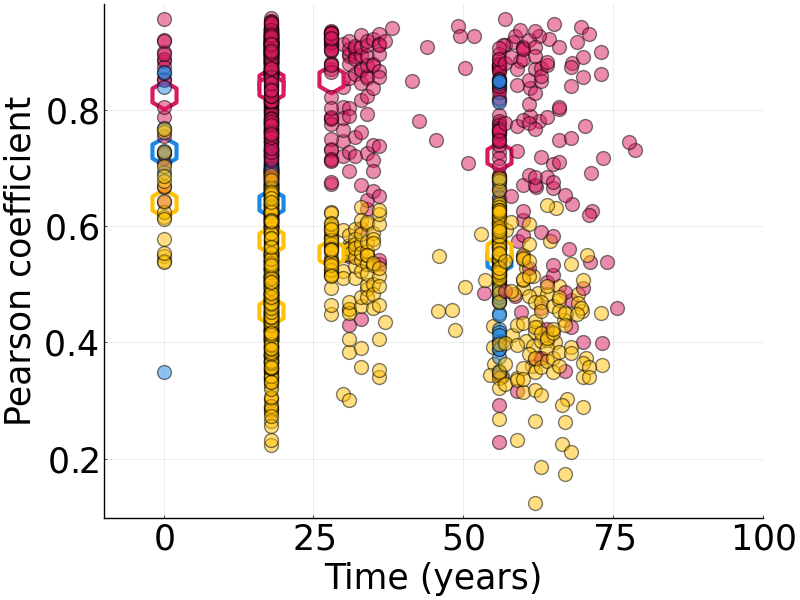

In [150]:
scatter()

scatter!([18.0], [GSE105018_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE105018_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE105018_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE105018_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE105018_dz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE105018_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!(age_GSE89093_mz, GSE89093_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(age_GSE89093_ur, GSE89093_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([56.0], [GSE100227_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], [GSE100227_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], [GSE100227_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], GSE100227_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], GSE100227_dz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], GSE100227_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!(age_GSE61496_mz, GSE61496_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(age_GSE61496_ur, GSE61496_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([28.0], [GSE43975_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], [GSE43975_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], GSE43975_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], GSE43975_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([18.0], [GSE154566_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE154566_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE154566_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE154566_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([0.0], [GSE36642_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 20, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 3, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_dz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

### GSE73115

In [151]:
#load data
data_mz_1997 = readdlm("GSE73115_MZ_1997.csv", ',', '\n')
data_mz_2007 = readdlm("GSE73115_MZ_2007.csv", ',', '\n')
data_dz_1997 = readdlm("GSE73115_DZ_1997.csv", ',', '\n')
data_dz_2007 = readdlm("GSE73115_DZ_2007.csv", ',', '\n')

12277×53 Matrix{Any}:
 ""                     …      "dizogitic"
 ""                            "GSM1887108_sample_table"
 ""                            "Individual_86_2007"
 ""                            "female"
 ""                          86
 "Reporter Identifier"  …    86
 ""                        2007
 "Reporter Identifier"         "female"
 "Reporter Identifier"         "GSM1887108_sample_table"
 "cg00001261"                 0.495379
 "cg00003818"           …     0.481826
 "cg00003900"                 0.398122
 "cg00007810"                 0.748238
 ⋮                      ⋱  
 "cg07499142"           …     0.552015
 "cg11145399"                 0.51204
 "cg04522575"                 0.599426
 "cg01342968"                 0.373321
 "cg08627010"                 0.560135
 "cg02401978"           …     0.652945
 "cg03723907"                 0.714363
 "cg02988826"                 0.54755
 "cg20133890"                 0.51583
 "cg13003311"                 0.573961
 "cg21241560"         

In [152]:
data_mz_1997 = DataFrame(data_mz_1997, :auto)
data_mz_2007 = DataFrame(data_mz_2007, :auto)
data_dz_1997 = DataFrame(data_dz_1997, :auto)
data_dz_2007 = DataFrame(data_dz_2007, :auto)

,x1,x2,x3,x4
,Any,Any,Any,Any
1,,dizogitic,dizogitic,dizogitic
2,,GSM1886937_sample_table,GSM1886938_sample_table,GSM1886939_sample_table
3,,Individual_3_2007,Individual_4_2007,Individual_5_2007
4,,female,female,male
5,,3,4,5
6,Reporter Identifier,3,4,5
7,,2007,2007,2007
8,Reporter Identifier,female,female,male
9,Reporter Identifier,GSM1886937_sample_table,GSM1886938_sample_table,GSM1886939_sample_table


In [153]:
data_mz_1997 = data_mz_1997[Not(1,2,3,4,5,6,7,8,9),:]
data_mz_2007 = data_mz_2007[Not(1,2,3,4,5,6,7,8,9),:]
data_dz_1997 = data_dz_1997[Not(1,2,3,4,5,6,7,8,9),:]
data_dz_2007 = data_dz_2007[Not(1,2,3,4,5,6,7,8,9),:]

,x1,x2,x3,x4,x5,x6,x7,x8
,Any,Any,Any,Any,Any,Any,Any,Any
1,cg00001261,0.564493,0.513681,0.563064,0.490387,0.614027,0.599089,0.523819
2,cg00003818,0.564963,0.491783,0.47285,0.478386,0.483636,0.553638,0.468138
3,cg00003900,0.632107,0.583627,0.408587,0.573648,0.533364,0.671095,0.409059
4,cg00007810,0.718528,0.712558,0.726882,0.77272,0.574957,0.736213,0.694216
5,cg00009088,0.332588,0.427233,0.442459,0.470247,0.42891,0.358746,0.612275
6,cg00010078,0.434739,0.491958,0.513206,0.498902,0.420875,0.477418,0.548373
7,cg00010954,0.479265,0.420261,0.396235,0.435844,0.290084,0.519188,0.554307
8,cg00011856,0.583986,0.608813,0.662614,0.615044,0.614411,0.618958,0.647506
9,cg00011924,0.407576,0.329628,0.456432,0.43095,0.323225,0.425835,0.453192


In [154]:
fCpG_list = vec(readdlm("TmobT.csv", ',', '\n'))

3918-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg02280132"
 "cg13218688"
 "cg25001930"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg00543073"
 ⋮
 "cg24863544"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [155]:
list_to_keep_mz_1997 = intersect(fCpG_list,data_mz_1997[:,1])
list_to_keep_mz_2007 = intersect(fCpG_list,data_mz_2007[:,1])
list_to_keep_dz_1997 = intersect(fCpG_list,data_dz_1997[:,1])
list_to_keep_dz_2007 = intersect(fCpG_list,data_dz_2007[:,1])

3918-element Vector{Any}:
 "cg26594419"
 "cg05618426"
 "cg23331156"
 "cg10809165"
 "cg10395101"
 "cg12226717"
 "cg02280132"
 "cg13218688"
 "cg25001930"
 "cg24724587"
 "cg08217526"
 "cg06294373"
 "cg00543073"
 ⋮
 "cg24863544"
 "cg24421397"
 "cg16417409"
 "cg21806985"
 "cg03568507"
 "cg06941429"
 "cg19497998"
 "cg00985115"
 "cg06800231"
 "cg06769994"
 "cg00378636"
 "cg17748769"

In [156]:
rows_to_keep_mz_1997 = findall(in(list_to_keep_mz_1997),data_mz_1997[:,1])
rows_to_keep_mz_2007 = findall(in(list_to_keep_mz_2007),data_mz_2007[:,1])
rows_to_keep_dz_1997 = findall(in(list_to_keep_dz_1997),data_dz_1997[:,1])
rows_to_keep_dz_2007 = findall(in(list_to_keep_dz_2007),data_dz_2007[:,1])

3918-element Vector{Int64}:
     1
     2
     3
     8
     9
    19
    22
    24
    28
    30
    38
    39
    40
     ⋮
 12228
 12236
 12239
 12240
 12247
 12248
 12249
 12254
 12261
 12264
 12267
 12268

In [157]:
data_mz_1997 = data_mz_1997[rows_to_keep_mz_1997,:]
data_mz_2007 = data_mz_2007[rows_to_keep_mz_2007,:]
data_dz_1997 = data_dz_1997[rows_to_keep_dz_1997,:]
data_dz_2007 = data_dz_2007[rows_to_keep_dz_2007,:]

,x1,x2,x3,x4,x5,x6,x7,x8
,Any,Any,Any,Any,Any,Any,Any,Any
1,cg00001261,0.564493,0.513681,0.563064,0.490387,0.614027,0.599089,0.523819
2,cg00003818,0.564963,0.491783,0.47285,0.478386,0.483636,0.553638,0.468138
3,cg00003900,0.632107,0.583627,0.408587,0.573648,0.533364,0.671095,0.409059
4,cg00011856,0.583986,0.608813,0.662614,0.615044,0.614411,0.618958,0.647506
5,cg00011924,0.407576,0.329628,0.456432,0.43095,0.323225,0.425835,0.453192
6,cg00036723,0.620084,0.641827,0.598115,0.5974,0.613252,0.576691,0.554437
7,cg00044354,0.549306,0.649231,0.557441,0.638509,0.608316,0.55169,0.631146
8,cg00045910,0.506089,0.478868,0.42824,0.39066,0.62949,0.728647,0.538745
9,cg00056066,0.547159,0.507211,0.533684,0.623162,0.54237,0.456465,0.444079


In [158]:
data_mz_1997_values = data_mz_1997[:,Not(1)]
data_mz_2007_values = data_mz_2007[:,Not(1)]
data_dz_1997_values = data_dz_1997[:,Not(1)]
data_dz_2007_values = data_dz_2007[:,Not(1)]

,x2,x3,x4,x5,x6,x7,x8,x9
,Any,Any,Any,Any,Any,Any,Any,Any
1,0.564493,0.513681,0.563064,0.490387,0.614027,0.599089,0.523819,0.572239
2,0.564963,0.491783,0.47285,0.478386,0.483636,0.553638,0.468138,0.701484
3,0.632107,0.583627,0.408587,0.573648,0.533364,0.671095,0.409059,0.641777
4,0.583986,0.608813,0.662614,0.615044,0.614411,0.618958,0.647506,0.573854
5,0.407576,0.329628,0.456432,0.43095,0.323225,0.425835,0.453192,0.498131
6,0.620084,0.641827,0.598115,0.5974,0.613252,0.576691,0.554437,0.625955
7,0.549306,0.649231,0.557441,0.638509,0.608316,0.55169,0.631146,0.645023
8,0.506089,0.478868,0.42824,0.39066,0.62949,0.728647,0.538745,0.772401
9,0.547159,0.507211,0.533684,0.623162,0.54237,0.456465,0.444079,0.35334


In [159]:
#Matrix of cpgs
array_values_mz_1997 = Matrix(data_mz_1997_values)
array_values_mz_2007 = Matrix(data_mz_2007_values)
array_values_dz_1997 = Matrix(data_dz_1997_values)
array_values_dz_2007 = Matrix(data_dz_2007_values)

3918×52 Matrix{Any}:
 0.564493  0.513681  0.563064  0.490387  …  0.55973   0.549462  0.495379
 0.564963  0.491783  0.47285   0.478386     0.481065  0.523797  0.481826
 0.632107  0.583627  0.408587  0.573648     0.537461  0.531447  0.398122
 0.583986  0.608813  0.662614  0.615044     0.590766  0.672709  0.649666
 0.407576  0.329628  0.456432  0.43095      0.381373  0.451964  0.49988
 0.620084  0.641827  0.598115  0.5974    …  0.49532   0.446039  0.541127
 0.549306  0.649231  0.557441  0.638509     0.575376  0.682332  0.637486
 0.506089  0.478868  0.42824   0.39066      0.528586  0.502566  0.519468
 0.547159  0.507211  0.533684  0.623162     0.638905  0.497803  0.519254
 0.580513  0.621514  0.564269  0.538392     0.57844   0.448464  0.577622
 0.65076   0.608893  0.471659  0.606264  …  0.677318  0.696495  0.717331
 0.623618  0.71981   0.737155  0.726296     0.548252  0.609079  0.713287
 0.663434  0.5147    0.644095  0.569584     0.616173  0.6959    0.646554
 ⋮                             

In [160]:
parse.(Float64,string.(array_values_mz_1997))
parse.(Float64,string.(array_values_mz_2007))
parse.(Float64,string.(array_values_dz_1997))
parse.(Float64,string.(array_values_dz_2007))

3918×52 Matrix{Float64}:
 0.564493  0.513681  0.563064  0.490387  …  0.55973   0.549462  0.495379
 0.564963  0.491783  0.47285   0.478386     0.481065  0.523797  0.481826
 0.632107  0.583627  0.408587  0.573648     0.537461  0.531447  0.398122
 0.583986  0.608813  0.662614  0.615044     0.590766  0.672709  0.649666
 0.407576  0.329628  0.456432  0.43095      0.381373  0.451964  0.49988
 0.620084  0.641827  0.598115  0.5974    …  0.49532   0.446039  0.541127
 0.549306  0.649231  0.557441  0.638509     0.575376  0.682332  0.637486
 0.506089  0.478868  0.42824   0.39066      0.528586  0.502566  0.519468
 0.547159  0.507211  0.533684  0.623162     0.638905  0.497803  0.519254
 0.580513  0.621514  0.564269  0.538392     0.57844   0.448464  0.577622
 0.65076   0.608893  0.471659  0.606264  …  0.677318  0.696495  0.717331
 0.623618  0.71981   0.737155  0.726296     0.548252  0.609079  0.713287
 0.663434  0.5147    0.644095  0.569584     0.616173  0.6959    0.646554
 ⋮                         

In [161]:
pearson_values_mz_1997 = cor(array_values_mz_1997)
pearson_values_mz_2007 = cor(array_values_mz_2007)
pearson_values_dz_1997 = cor(array_values_dz_1997)
pearson_values_dz_2007 = cor(array_values_dz_2007)

52×52 Matrix{Float64}:
 1.0       0.484942  0.45639   0.473109  …  0.502551  0.466262  0.470609
 0.484942  1.0       0.374866  0.435766     0.352891  0.379559  0.446308
 0.45639   0.374866  1.0       0.569055     0.454747  0.376262  0.427816
 0.473109  0.435766  0.569055  1.0          0.468569  0.406198  0.501395
 0.526258  0.431288  0.464636  0.508523     0.48827   0.42963   0.486654
 0.446906  0.333967  0.384332  0.440015  …  0.398118  0.364018  0.377929
 0.494157  0.433329  0.458501  0.519942     0.435192  0.3845    0.47712
 0.300993  0.293792  0.291714  0.310763     0.297255  0.251686  0.27814
 0.446993  0.404732  0.445025  0.510903     0.453537  0.379295  0.45075
 0.417848  0.408853  0.407263  0.500804     0.391061  0.372934  0.466206
 0.500085  0.384707  0.430706  0.506406  …  0.450958  0.413357  0.443418
 0.339985  0.251352  0.304188  0.325079     0.329051  0.296454  0.256027
 0.525592  0.455958  0.505885  0.569392     0.512808  0.4287    0.485528
 ⋮                             

In [162]:
mz_comparisons_1997 = zeros(Integer(size(pearson_values_mz_1997,1)/2))
for i = 1:length(mz_comparisons_1997)
    mz_comparisons_1997[i] = pearson_values_mz_1997[2*i,2*i-1]
end
mz_comparisons_1997

mz_comparisons_2007 = zeros(Integer(size(pearson_values_mz_2007,1)/2))
for i = 1:length(mz_comparisons_2007)
    mz_comparisons_2007[i] = pearson_values_mz_2007[2*i,2*i-1]
end
mz_comparisons_2007

14-element Vector{Float64}:
 0.8041981528618602
 0.5536369130373522
 0.8950981061676618
 0.7344156954023215
 0.6967204226143641
 0.6466839348966391
 0.47314731621908074
 0.8810686991643664
 0.5796976058259012
 0.8157798425449061
 0.8173590586825159
 0.6800096491060913
 0.58235681267913
 0.31964363933364687

In [163]:
mean(mz_comparisons_1997)

0.7361665000216738

In [164]:
mean(mz_comparisons_2007)

0.6771297034668455

In [165]:
dz_comparisons_1997 = zeros(Integer(size(pearson_values_dz_1997,1)/2))
for i = 1:length(dz_comparisons_1997)
    dz_comparisons_1997[i] = pearson_values_dz_1997[2*i,2*i-1]
end
dz_comparisons_1997

dz_comparisons_2007 = zeros(Integer(size(pearson_values_dz_2007,1)/2))
for i = 1:length(dz_comparisons_2007)
    dz_comparisons_2007[i] = pearson_values_dz_2007[2*i,2*i-1]
end
dz_comparisons_2007

26-element Vector{Float64}:
 0.48494179669494525
 0.5690545720552745
 0.51121723292361
 0.36862251345044145
 0.5473630267616937
 0.3700089881243437
 0.5420446113837104
 0.29370638690126843
 0.41594632181638874
 0.38966236991604725
 0.6518534892908071
 0.30786096706055516
 0.24171495352839195
 0.5701772190358327
 0.3075118361776193
 0.25212860203244486
 0.42352755258576924
 0.5017932417227274
 0.18501534934381372
 0.5962792053184324
 0.2529620961919655
 0.3431452376033164
 0.24793314583954024
 0.6140012956626013
 0.5145204103929771
 0.48703553255426285

In [166]:
mean(dz_comparisons_1997)

0.48439571283739336

In [167]:
mean(dz_comparisons_2007)

0.42269338286033775

In [168]:
ur_comparisons_1997 = zeros(Integer(size(pearson_values_mz_1997,1)/2)-1)
for i = 1:length(ur_comparisons_1997)
    ur_comparisons_1997[i] = pearson_values_mz_1997[2*i+1,2*i]
end
ur_comparisons_1997

ur_comparisons_2007 = zeros(Integer(size(pearson_values_mz_2007,1)/2)-1)
for i = 1:length(ur_comparisons_2007)
    ur_comparisons_2007[i] = pearson_values_mz_2007[2*i+1,2*i]
end
ur_comparisons_2007

13-element Vector{Float64}:
 0.45400246728931254
 0.2753595371387453
 0.3819582417416419
 0.37449159517544184
 0.3642653171357601
 0.2770546873105317
 0.2937882897199227
 0.414509476561616
 0.505693023277548
 0.34626234548581414
 0.4888399783395136
 0.2492246706660655
 0.2411983405403347

In [169]:
mean(ur_comparisons_1997)

0.4058888230344022

In [170]:
mean(ur_comparisons_2007)

0.3589729207986344

In [171]:
GSE73115_mz_1997_mean = mean(mz_comparisons_1997)
GSE73115_mz_1997 = mz_comparisons_1997
GSE73115_mz_2007_mean = mean(mz_comparisons_2007)
GSE73115_mz_2007 = mz_comparisons_2007

GSE73115_dz_1997_mean = mean(dz_comparisons_1997)
GSE73115_dz_1997 = dz_comparisons_1997
GSE73115_dz_2007_mean = mean(dz_comparisons_2007)
GSE73115_dz_2007 = dz_comparisons_2007

GSE73115_ur_1997_mean = mean(ur_comparisons_1997)
GSE73115_ur_1997 = ur_comparisons_1997
GSE73115_ur_2007_mean = mean(ur_comparisons_2007)
GSE73115_ur_2007 = ur_comparisons_2007

13-element Vector{Float64}:
 0.45400246728931254
 0.2753595371387453
 0.3819582417416419
 0.37449159517544184
 0.3642653171357601
 0.2770546873105317
 0.2937882897199227
 0.414509476561616
 0.505693023277548
 0.34626234548581414
 0.4888399783395136
 0.2492246706660655
 0.2411983405403347

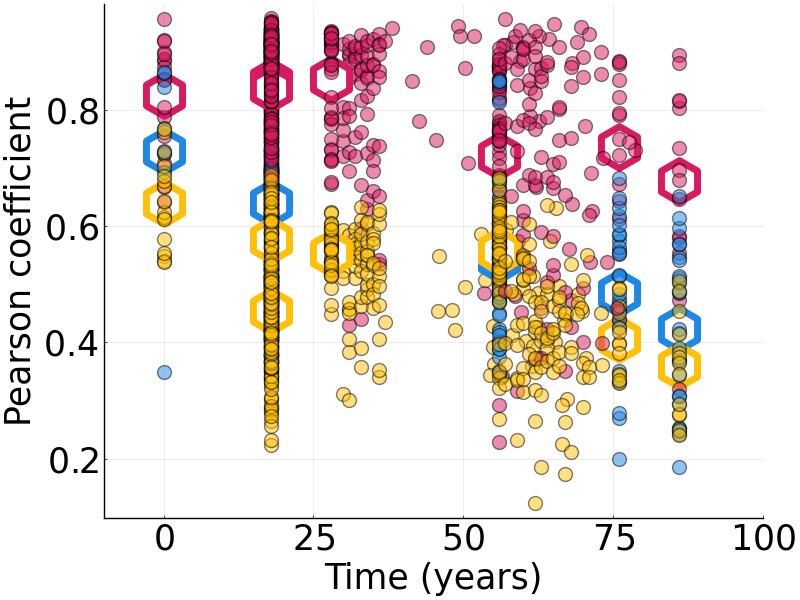

In [172]:
scatter()

scatter!([86.0], [GSE73115_mz_2007_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([86.0], [GSE73115_dz_2007_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([86.0], [GSE73115_ur_2007_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([86.0], GSE73115_mz_2007, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([86.0], GSE73115_dz_2007, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([86.0], GSE73115_ur_2007, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([76.0], [GSE73115_mz_1997_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([76.0], [GSE73115_dz_1997_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([76.0], [GSE73115_ur_1997_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([76.0], GSE73115_mz_1997, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([76.0], GSE73115_dz_1997, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([76.0], GSE73115_ur_1997, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([18.0], [GSE105018_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE105018_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE105018_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE105018_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE105018_dz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE105018_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!(age_GSE89093_mz, GSE89093_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(age_GSE89093_ur, GSE89093_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([56.0], [GSE100227_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], [GSE100227_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], [GSE100227_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], GSE100227_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], GSE100227_dz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], GSE100227_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!(age_GSE61496_mz, GSE61496_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(age_GSE61496_ur, GSE61496_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([28.0], [GSE43975_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], [GSE43975_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], GSE43975_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], GSE43975_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([18.0], [GSE154566_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE154566_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE154566_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], GSE154566_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([0.0], [GSE36642_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_mz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_dz, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], GSE36642_ur, xlims = [-10, 100], alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

### Plot data

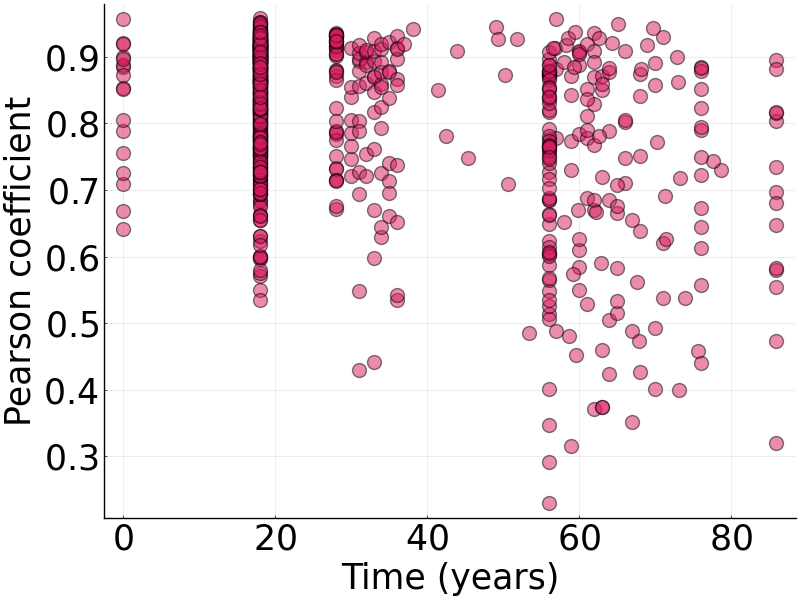

In [173]:
#data (monozygotic twins)
time_mz = []
data_mz = []

time_GSE36642 = zeros(length(GSE36642_mz))
time_GSE154566 = zeros(length(GSE154566_mz)) .+ 18.0
time_GSE43975 = zeros(length(GSE43975_mz)) .+ 28.0
time_GSE61496 = age_GSE61496_mz
time_GSE100227 = zeros(length(GSE100227_mz)) .+ 56.0
time_GSE89093 = age_GSE89093_mz
time_GSE105018 = zeros(length(GSE105018_mz)) .+ 18.0
time_GSE73115_1997 = zeros(length(GSE73115_mz_1997)) .+ 76.0
time_GSE73115_2007 = zeros(length(GSE73115_mz_2007)) .+ 86.0
time_mz = append!(time_mz, time_GSE36642, time_GSE154566, time_GSE43975, time_GSE61496, time_GSE100227, time_GSE89093, time_GSE105018, time_GSE73115_1997, time_GSE73115_2007)

data_mz = append!(data_mz, GSE36642_mz, GSE154566_mz, GSE43975_mz, GSE61496_mz, GSE100227_mz, GSE89093_mz, GSE105018_mz, GSE73115_mz_1997, GSE73115_mz_2007)

scatter()
scatter!(time_mz, data_mz, alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

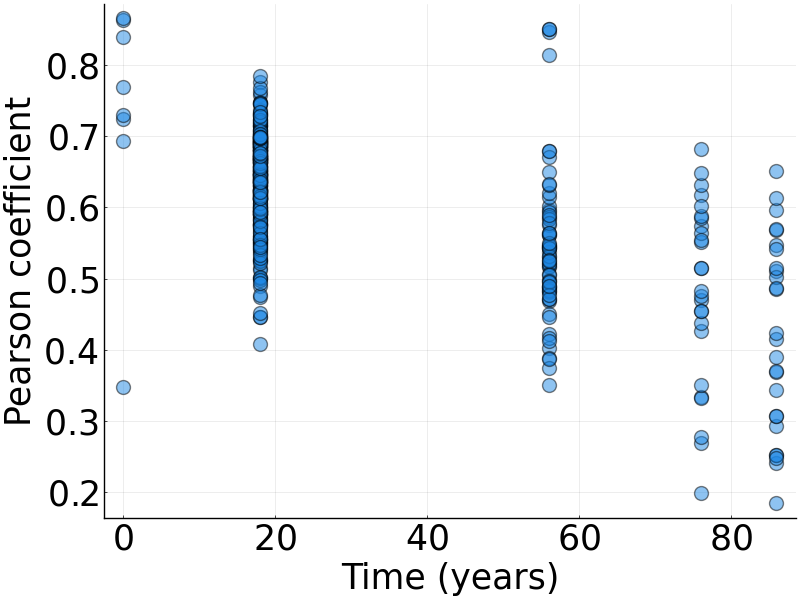

In [174]:
#data (dizygotic twins)
time_dz = []
data_dz = []

time_GSE36642 = zeros(length(GSE36642_dz))
time_GSE100227 = zeros(length(GSE100227_dz)) .+ 56.0
time_GSE105018 = zeros(length(GSE105018_dz)) .+ 18.0
time_GSE73115_1997 = zeros(length(GSE73115_dz_1997)) .+ 76.0
time_GSE73115_2007 = zeros(length(GSE73115_dz_2007)) .+ 86.0
time_dz = append!(time_dz, time_GSE36642, time_GSE100227, time_GSE105018, time_GSE73115_1997, time_GSE73115_2007)

data_dz = append!(data_dz, GSE36642_dz, GSE100227_dz, GSE105018_dz, GSE73115_dz_1997, GSE73115_dz_2007)

scatter()
scatter!(time_dz, data_dz, alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

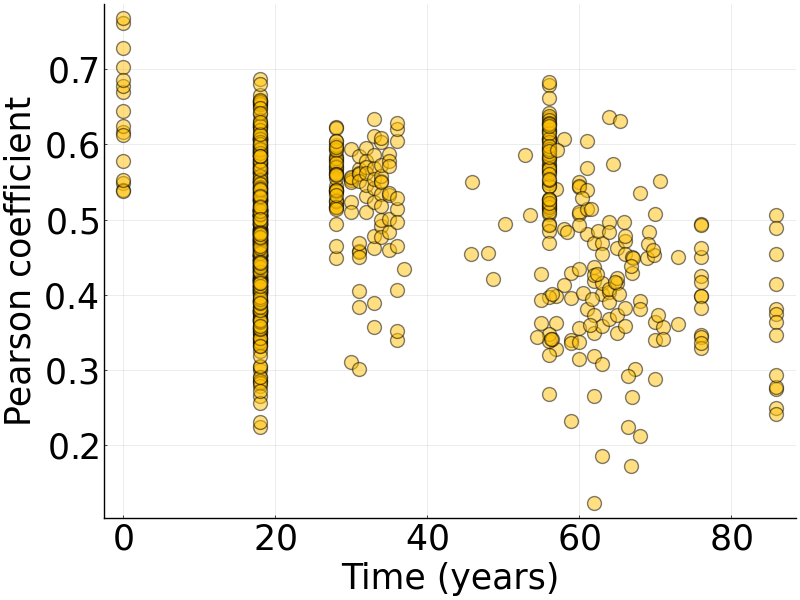

In [175]:
#data (unrelated individuals)
time_ur = []
data_ur = []

time_GSE36642 = zeros(length(GSE36642_ur))
time_GSE154566 = zeros(length(GSE154566_ur)) .+ 18.0
time_GSE43975 = zeros(length(GSE43975_ur)) .+ 28.0
time_GSE61496 = age_GSE61496_ur
time_GSE100227 = zeros(length(GSE100227_ur)) .+ 56.0
time_GSE89093 = age_GSE89093_ur
time_GSE105018 = zeros(length(GSE105018_ur)) .+ 18.0
time_GSE73115_1997 = zeros(length(GSE73115_ur_1997)) .+ 76.0
time_GSE73115_2007 = zeros(length(GSE73115_ur_2007)) .+ 86.0
time_ur = append!(time_ur, time_GSE36642, time_GSE154566, time_GSE43975, time_GSE61496, time_GSE100227, time_GSE89093, time_GSE105018, time_GSE73115_1997, time_GSE73115_2007)

data_ur = append!(data_ur, GSE36642_ur, GSE154566_ur, GSE43975_ur, GSE61496_ur, GSE100227_ur, GSE89093_ur, GSE105018_ur, GSE73115_ur_1997, GSE73115_ur_2007)

scatter()
scatter!(time_ur, data_ur, alpha = 0.5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

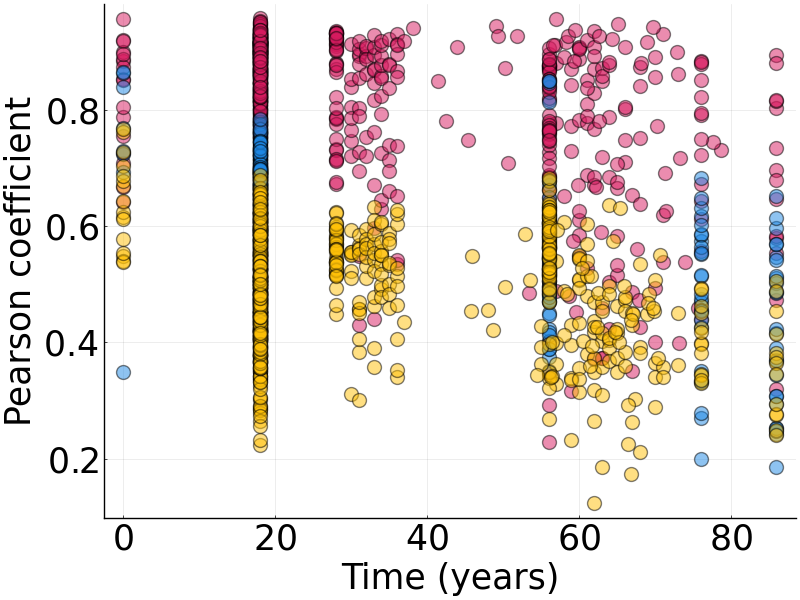

In [176]:
#plot all data together
scatter()
scatter!(time_mz, data_mz, markersize = 10, alpha = 0.5, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_dz, data_dz, markersize = 10, alpha = 0.5, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_ur, data_ur, markersize = 10, alpha = 0.5, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

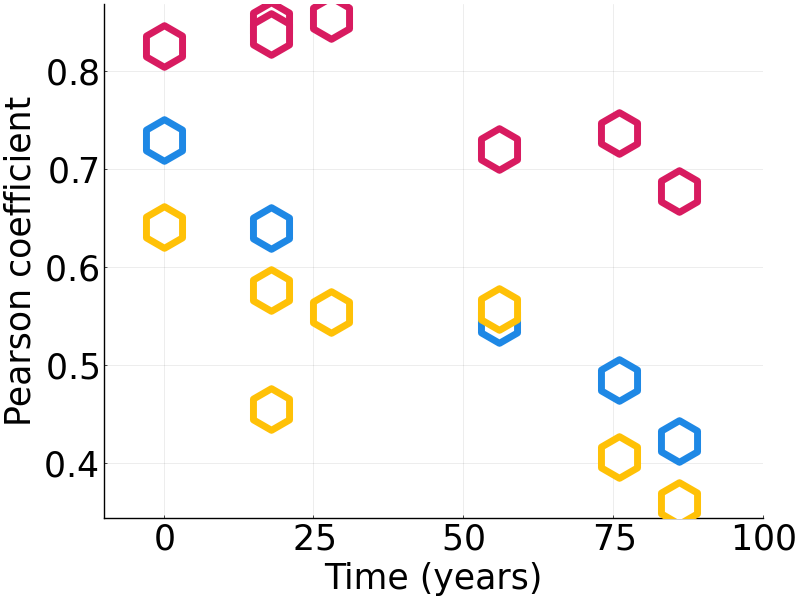

In [177]:
#plot all data together (means)
scatter()

scatter!([86.0], [GSE73115_mz_2007_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([86.0], [GSE73115_dz_2007_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([86.0], [GSE73115_ur_2007_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([76.0], [GSE73115_mz_1997_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([76.0], [GSE73115_dz_1997_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([76.0], [GSE73115_ur_1997_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([18.0], [GSE105018_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE105018_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE105018_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([56.0], [GSE100227_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], [GSE100227_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([56.0], [GSE100227_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([28.0], [GSE43975_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([28.0], [GSE43975_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([18.0], [GSE154566_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([18.0], [GSE154566_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!([0.0], [GSE36642_mz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_dz_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!([0.0], [GSE36642_ur_mean], xlims = [-10, 100], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

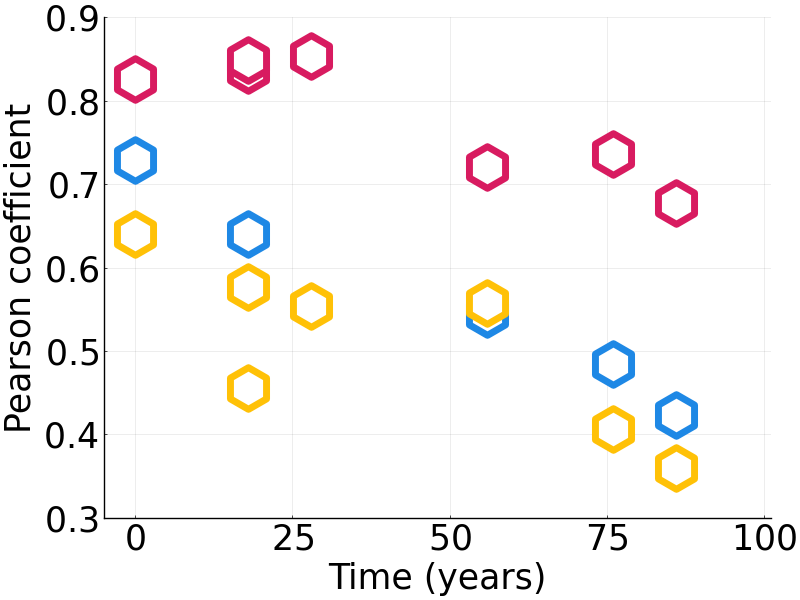

In [178]:
#data 
time_mean_mz = [0.0, 18.0, 28.0, 56.0, 18.0, 76.0, 86.0]
data_mean_mz = [GSE36642_mz_mean, GSE154566_mz_mean, GSE43975_mz_mean, GSE100227_mz_mean, GSE105018_mz_mean, GSE73115_mz_1997_mean, GSE73115_mz_2007_mean]

time_mean_dz = [0.0, 56.0, 18.0, 76.0, 86.0]
data_mean_dz = [GSE36642_dz_mean, GSE100227_dz_mean, GSE105018_dz_mean, GSE73115_dz_1997_mean, GSE73115_dz_2007_mean]

time_mean_ur = [0.0, 18.0, 28.0, 56.0, 18.0, 76.0, 86.0]
data_mean_ur = [GSE36642_ur_mean, GSE154566_ur_mean, GSE43975_ur_mean, GSE100227_ur_mean, GSE105018_ur_mean, GSE73115_ur_1997_mean, GSE73115_ur_2007_mean]

#plot all data together
scatter()
scatter!(time_mean_mz, data_mean_mz, xlims = [-5, 101], ylims = (0.3, 0.8), alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_mean_dz, data_mean_dz, xlims = [-5, 101], ylims = (0.3, 0.9), alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_mean_ur, data_mean_ur, xlims = [-5, 101], ylims = (0.3, 0.9), alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

In [179]:
#line of best fit and confidence interval (monozygotic twins) 
@. model(x, p) = p[1]*x + p[2]
p0 = [-1.0, 1.0]
fit_mean_mz = curve_fit(model, time_mean_mz, data_mean_mz, p0)
sigma_mean_mz = stderror(fit_mean_mz)
margin_of_error_mean_mz = margin_error(fit_mean_mz, 0.05)
confidence_inter_mean_mz = confidence_interval(fit_mean_mz, 0.05)
bf_parms_mean_mz = coef(fit_mean_mz)

2-element Vector{Float64}:
 -0.002002027373549848
  0.866231665987594

In [180]:
interval_p1_mean_mz = confidence_inter_mean_mz[1]

(-0.0031007428157775836, -0.0009033119313221127)

In [181]:
interval_p2_mean_mz = confidence_inter_mean_mz[2]

(0.8109204742092124, 0.9215428577659757)

In [182]:
#line of best fit and confidence interval (dizygotic twins) 
@. model(x, p) = p[1]*x + p[2]
p0 = [-1.0, 1.0]
fit_mean_dz = curve_fit(model, time_mean_dz, data_mean_dz, p0)
sigma_mean_dz = stderror(fit_mean_dz)
margin_of_error_mean_dz = margin_error(fit_mean_dz, 0.05)
confidence_inter_mean_dz = confidence_interval(fit_mean_dz, 0.05)
bf_parms_mean_dz = coef(fit_mean_dz)

2-element Vector{Float64}:
 -0.003268442721304369
  0.7182065057877078

In [183]:
interval_p1_mean_dz = confidence_inter_mean_dz[1]

(-0.004052824714293255, -0.0024840607283154828)

In [184]:
interval_p2_mean_dz = confidence_inter_mean_dz[2]

(0.6729673125924238, 0.7634456989829919)

In [185]:
#line of best fit and confidence interval (unrelated individuals) 
@. model(x, p) = p[1]*x + p[2]
p0 = [-1.0, 1.0]
fit_mean_ur = curve_fit(model, time_mean_ur, data_mean_ur, p0)
sigma_mean_ur = stderror(fit_mean_ur)
margin_of_error_mean_ur = margin_error(fit_mean_ur, 0.05)
confidence_inter_mean_ur = confidence_interval(fit_mean_ur, 0.05)
bf_parms_mean_ur = coef(fit_mean_ur)

2-element Vector{Float64}:
 -0.0024988537114151135
  0.6076253109741785

In [186]:
interval_p1_mean_ur = confidence_inter_mean_ur[1]

(-0.004656637828577773, -0.00034106959425245394)

In [187]:
interval_p2_mean_ur = confidence_inter_mean_ur[2]

(0.4989988126710939, 0.7162518092772631)

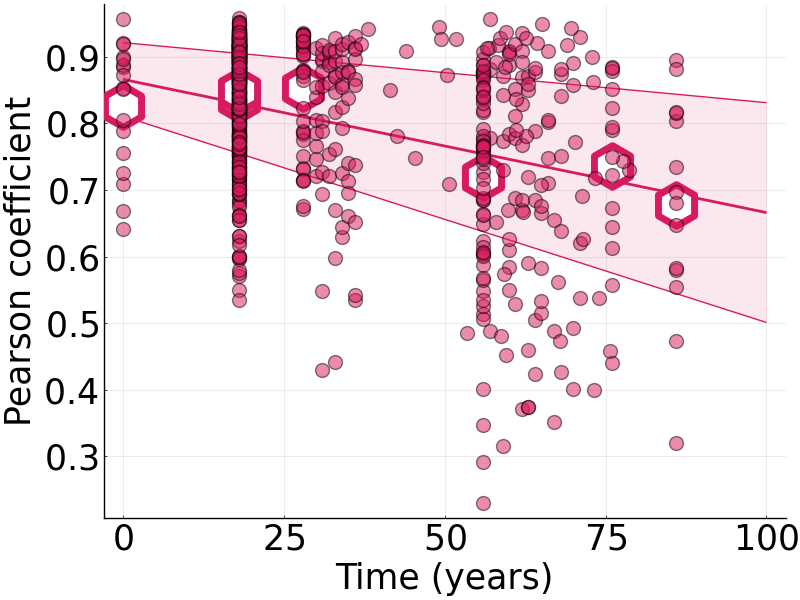

In [188]:
#plot with line of best fit and confidence interval (monozygotic twins) 
scatter()
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), linewidth = 1, color = color1, alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[1], interval_p2_mean_mz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), fillalpha = 0.1, color = color1, label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_mz[1], bf_parms_mean_mz[2]]), linewidth = 2, color = color1, alpha = 1)
scatter!(time_mean_mz, data_mean_mz, alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_mz, data_mz, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

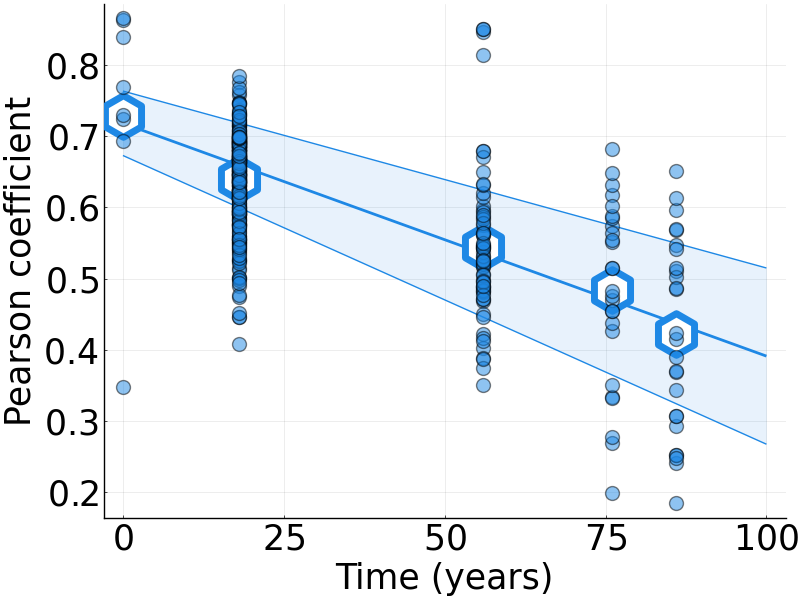

In [189]:
#plot with line of best fit and confidence interval (dizygotic twins) 
scatter()
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), linewidth = 1, color = color3, alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[1], interval_p2_mean_dz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), fillalpha = 0.1, color = color3, label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_dz[1], bf_parms_mean_dz[2]]), linewidth = 2, color = color3, alpha = 1)
scatter!(time_mean_dz, data_mean_dz, alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_dz, data_dz, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

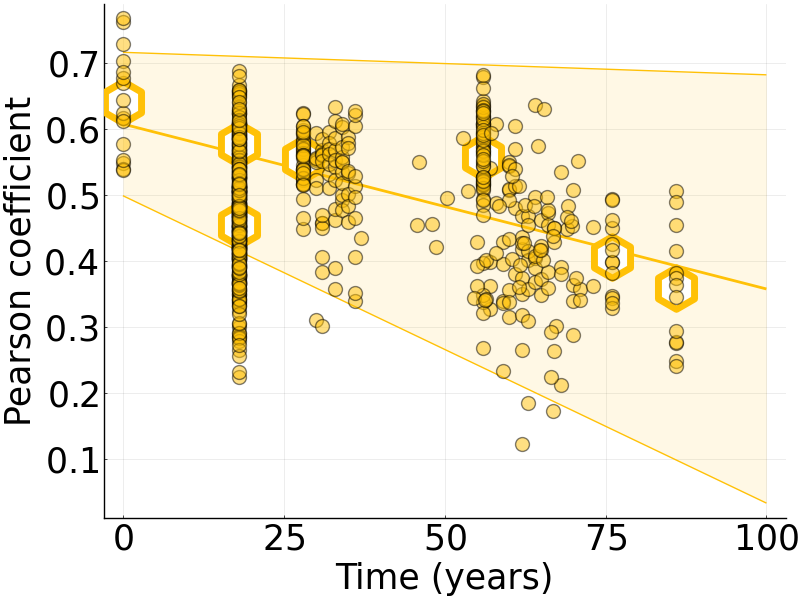

In [190]:
#plot with line of best fit and confidence interval (unrelated individuals) 
scatter()
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), linewidth = 1, color = color5, alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[1], interval_p2_mean_ur[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), fillalpha = 0.1, color = color5, label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_ur[1], bf_parms_mean_ur[2]]), linewidth = 2, color = color5, alpha = 1)
scatter!(time_mean_ur, data_mean_ur, alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_ur, data_ur, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

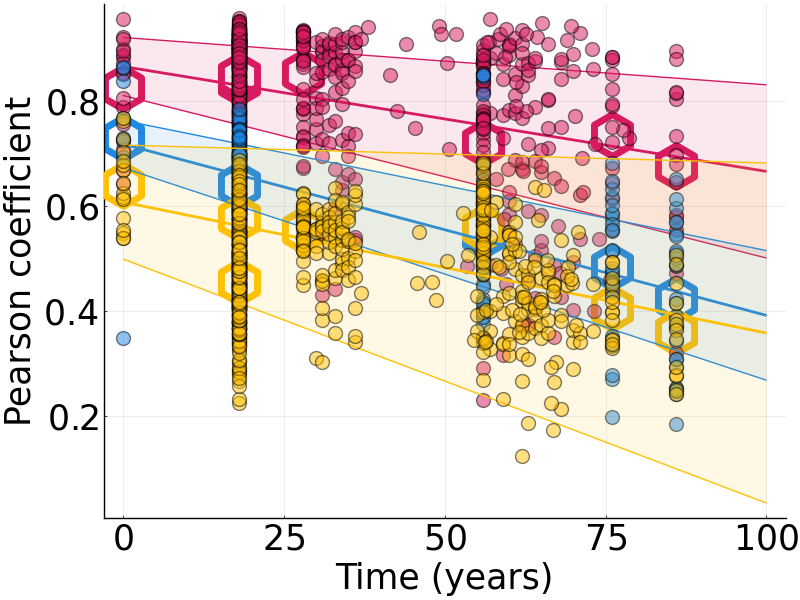

In [191]:
#plot all data together
scatter()

scatter!(time_mean_mz, data_mean_mz, alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_mean_dz, data_mean_dz, alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_mean_ur, data_mean_ur, alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), linewidth = 1, color = color1, alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[1], interval_p2_mean_mz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), fillalpha = 0.1, color = color1, label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_mz[1], bf_parms_mean_mz[2]]), linewidth = 2, color = color1, alpha = 1)
scatter!(time_mz, data_mz, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), linewidth = 1, color = color3, alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[1], interval_p2_mean_dz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), fillalpha = 0.1, color = color3, label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_dz[1], bf_parms_mean_dz[2]]), linewidth = 2, color = color3, alpha = 1)
scatter!(time_dz, data_dz, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), linewidth = 1, color = color5, alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[1], interval_p2_mean_ur[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), fillalpha = 0.1, color = color5, label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_ur[1], bf_parms_mean_ur[2]]), linewidth = 2, color = color5, alpha = 1)
scatter!(time_ur, data_ur, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)